# Home Credit Dataset

***Abstract***: Home Credit is a company primarily engaged in lending loans, and they usually have clients without any credit history. Thus, their models use various alternative data to predict their clients' repayment capacities. In this way, they made public datasets for a Kaggle competition for creating explainable lending models. These datasets have over 200 attributes and over 300.000 individuals. Among the attributes is sensitive information such as the gender of the applicant, so the same experiments that I applied in the German Credit dataset can be applied to this new data.

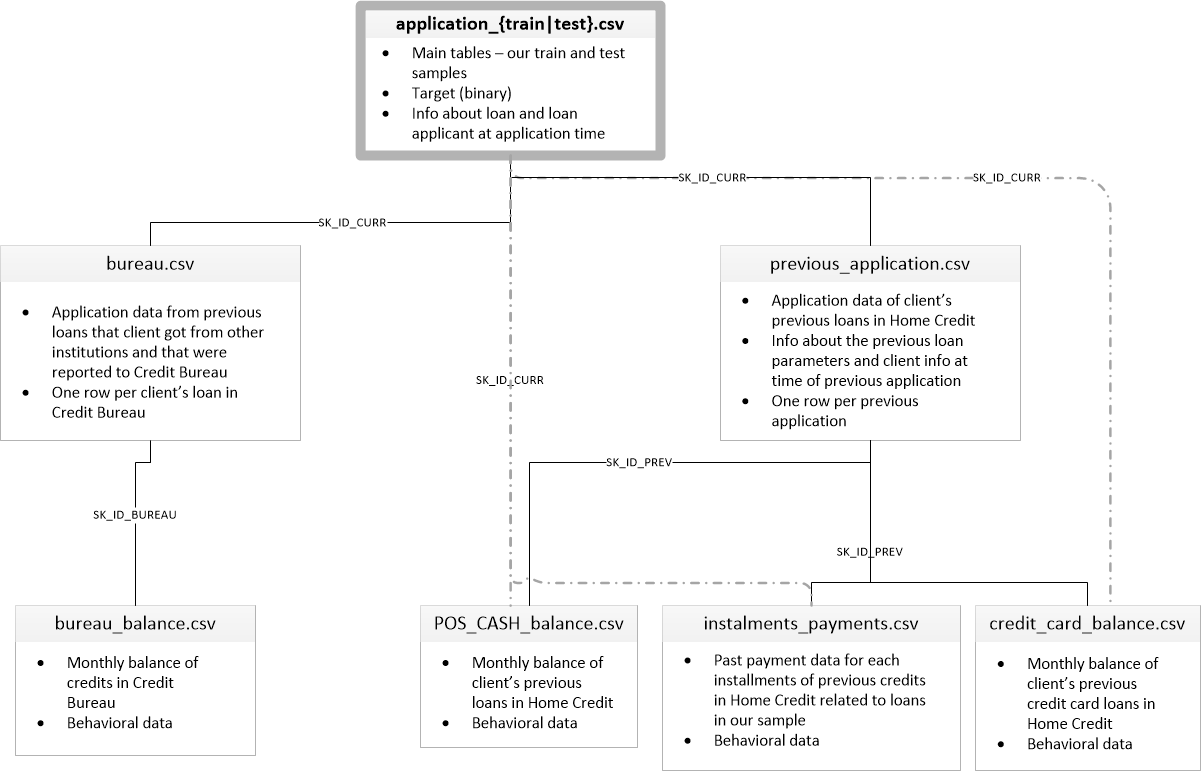

***Some attributes***:
- **TARGET (renamed as Class)**: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases). [0 (282.686), 1 (24.825)]
- **CODE_GENDER**: Gender of the client. [M (105.059), F (202.448), XNA (4)]
- **AMT_CREDIT**: Credit amount of the loan
- **FLAG_OWN_CAR**: Flag if client owns a car
- **FLAG_OWN_REALTY**: Flag if client owns a house or flat
- **REGION_POPULATION_RELATIVE**: Normalized population of region where client lives (higher number means the client lives in more populated region)
- **DAYS_BIRTH**: Client's age in days at the time of application


## 1. Needed imports

In [75]:
# Libraries and functions
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import category_encoders as ce
import numpy as np
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import tree, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Own modules
import apply_metrics
from preprocessing import get_data, clean_data, process_data, split_data, get_res_df, decoding, get_df4chi, ignore_attribute_n_values, fill_nan
from statistical_measures import get_entropy, get_mi, get_gr, get_suc, get_chi2, get_mannwhitneyu
from machine_learning import train_model, test_model, print_results, search_best_attributes, search_best_attributes_for_fairness
from visualization import show_histogram, compare_histogram, show_correlation_matrix, plot_dictionaries, plot_horizontal_dictionaries
from kaggle_home import get_kaggle_processed_data

## 3. Data visualization and correlation tests

In [47]:
df = pd.read_csv('/Users/app245/Documents/Datasets/HomeCredit/application_train.csv')
df = df.dropna(axis=1)
df = clean_data(df, dataset_name='home')
df

SK_ID_CURR  Class NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002      1         Cash loans           M            N   
1           100003      0         Cash loans           F            N   
2           100004      0    Revolving loans           M            Y   
3           100006      0         Cash loans           F            N   
4           100007      0         Cash loans           M            N   
...            ...    ...                ...         ...          ...   
307506      456251      0         Cash loans           M            N   
307507      456252      0         Cash loans           F            N   
307508      456253      0         Cash loans           F            N   
307509      456254      1         Cash loans           F            N   
307510      456255      0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

            NAME_INCOME_TYPE  ... FLAG_DOCUMENT_12 FLAG_DOCUMENT_13  \
0                    Working  ...                0                0   
1              State servant  ...                0                0   
2                    Working  ...                0                0   
3                    Working  ...                0                0   
4                    Working  ...                0                0   
...                      ...  ...              ...              ...   
307506               Working  ...                0                0   
307507             Pensioner  ...                0                0   
307508               Working  ...                0                0   
307509  Commercial associate  ...                0                0   
307510  Commercial associate  ...                0                0   

       FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     0                 0                 0                 0   
...                 ...               ...               ...               ...   
307506                0                 0                 0                 0   
307507                0                 0                 0                 0   
307508                0                 0                 0                 0   
307509                0                 0                 0                 0   
307510                0                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0                 0  
1                      0                 0                 0                 0  
2                      0                 0                 0                 0  
3                      0                 0                 0                 0  
4                      0                 0                 

In [48]:
df_females = df[df['CODE_GENDER'] == 'F']
df_males = df[df['CODE_GENDER'] == 'M']

### 3.1 Histograms

SK_ID_CURR


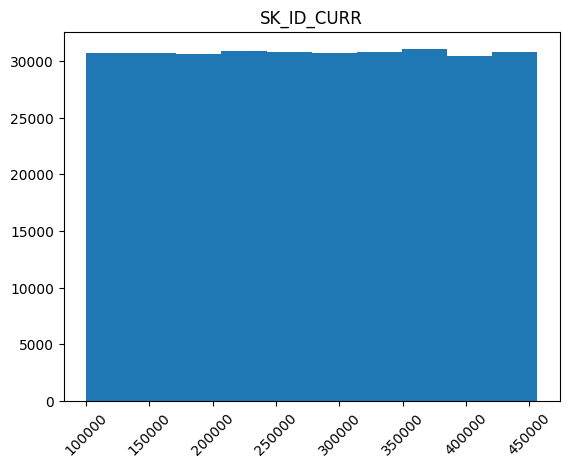

Class


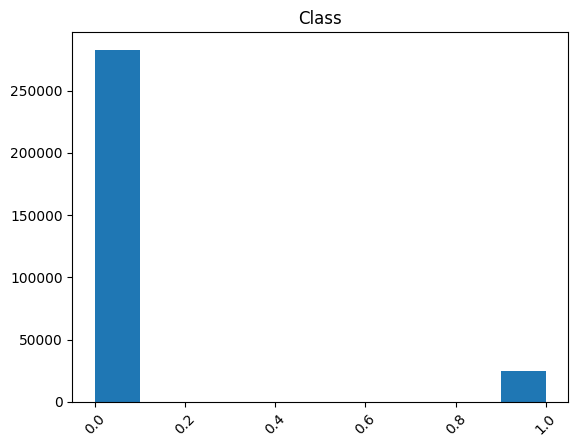

NAME_CONTRACT_TYPE


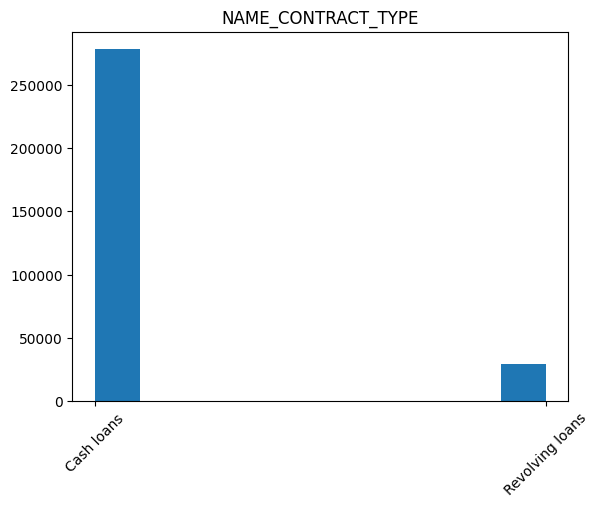

CODE_GENDER


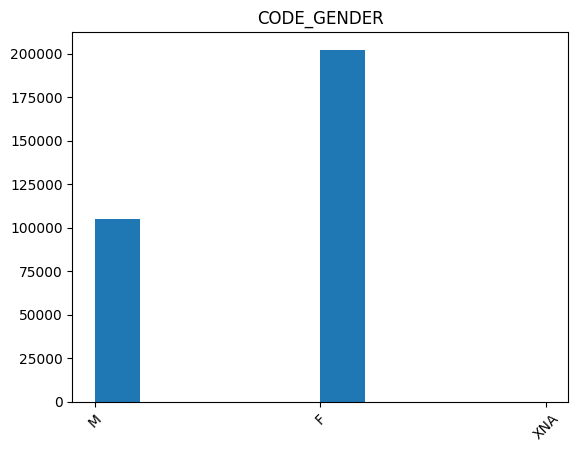

FLAG_OWN_CAR


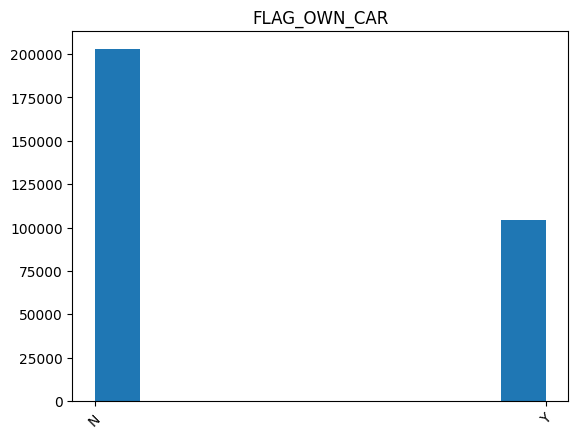

FLAG_OWN_REALTY


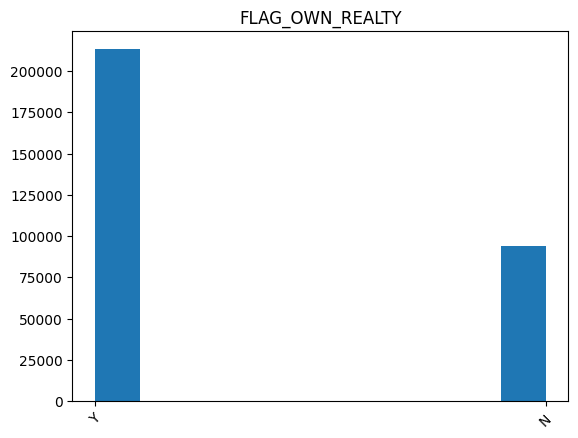

CNT_CHILDREN


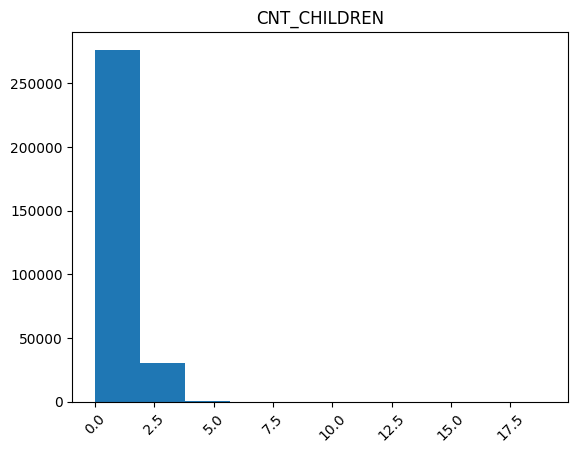

AMT_INCOME_TOTAL


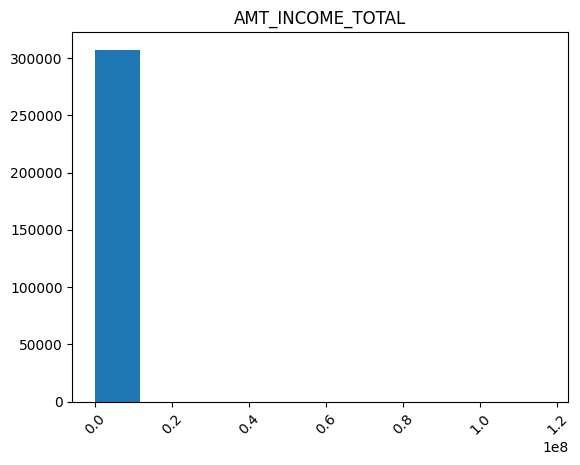

AMT_CREDIT


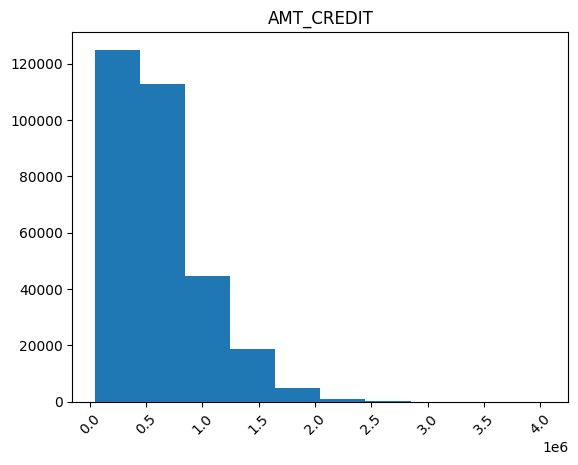

NAME_INCOME_TYPE


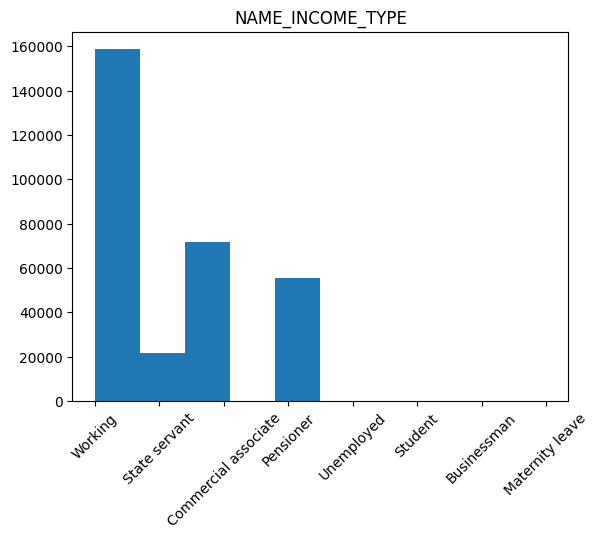

NAME_EDUCATION_TYPE


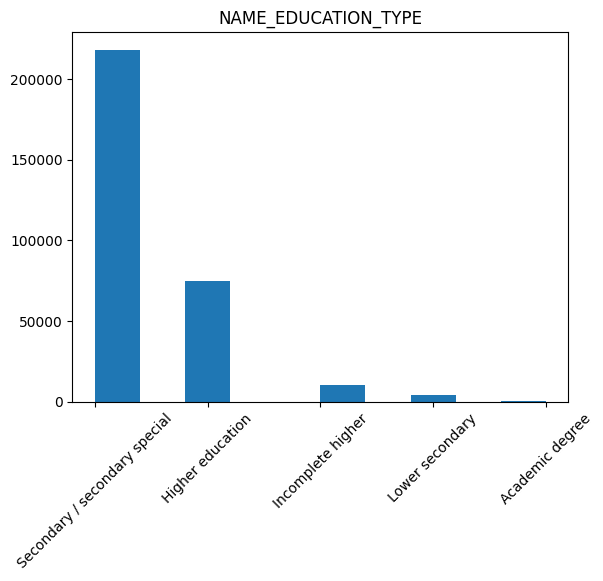

NAME_FAMILY_STATUS


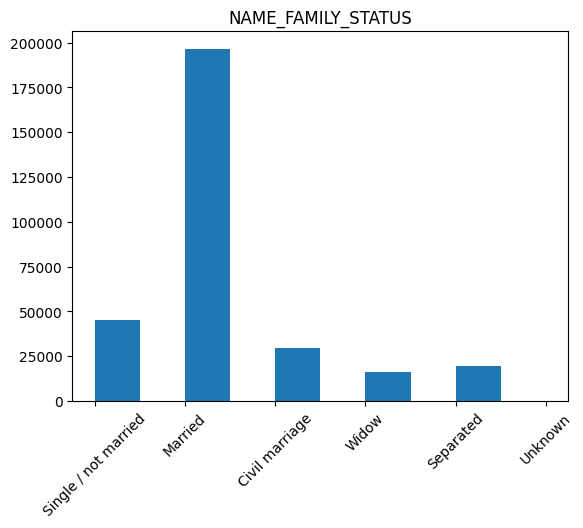

NAME_HOUSING_TYPE


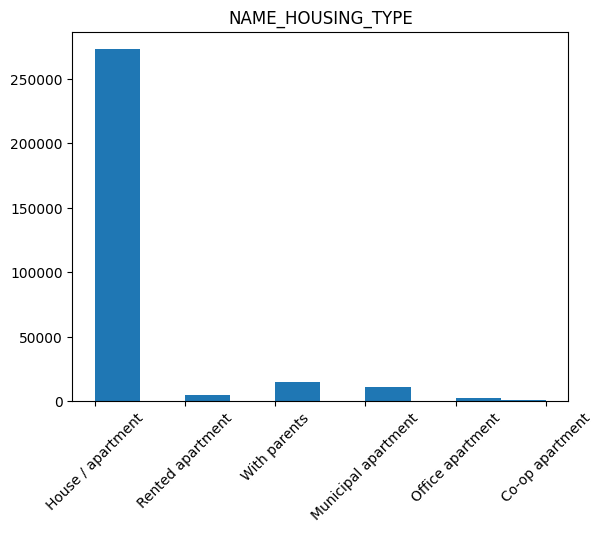

REGION_POPULATION_RELATIVE


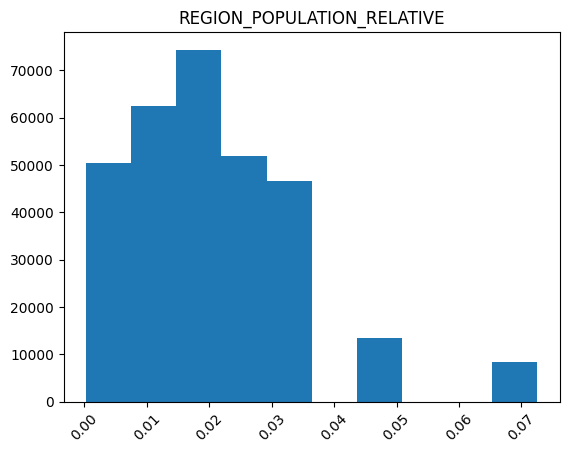

DAYS_BIRTH


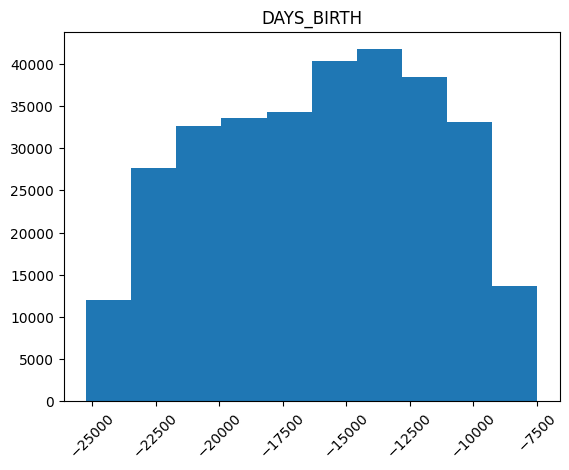

DAYS_EMPLOYED


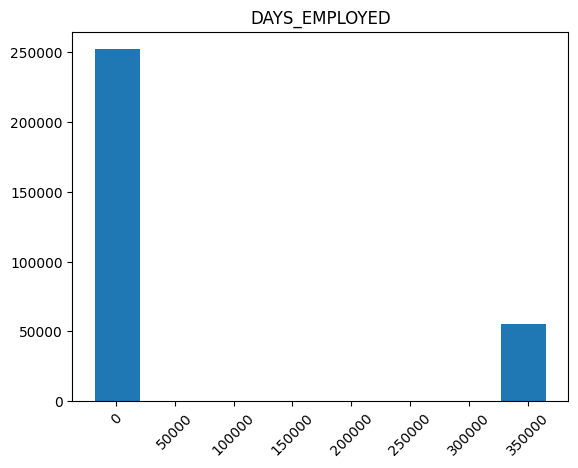

DAYS_REGISTRATION


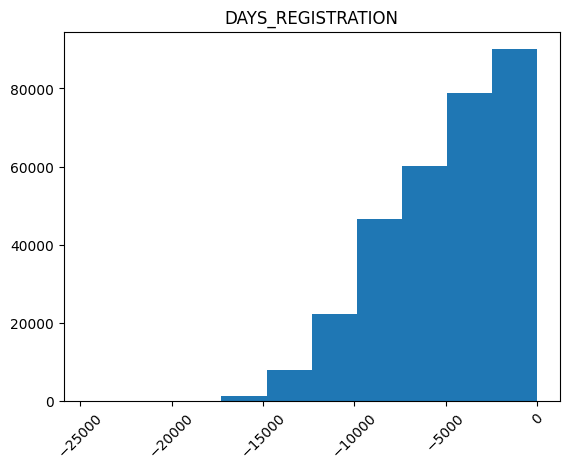

DAYS_ID_PUBLISH


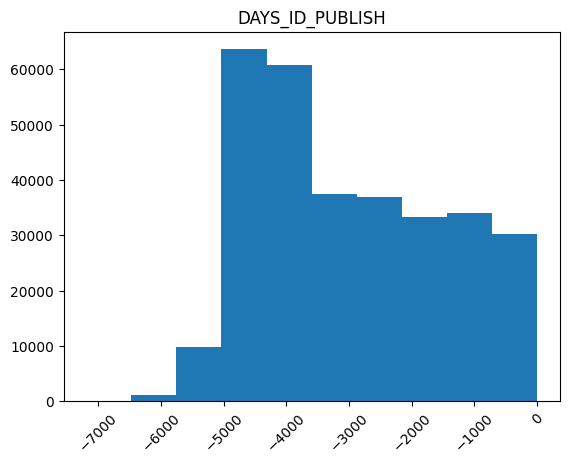

FLAG_MOBIL


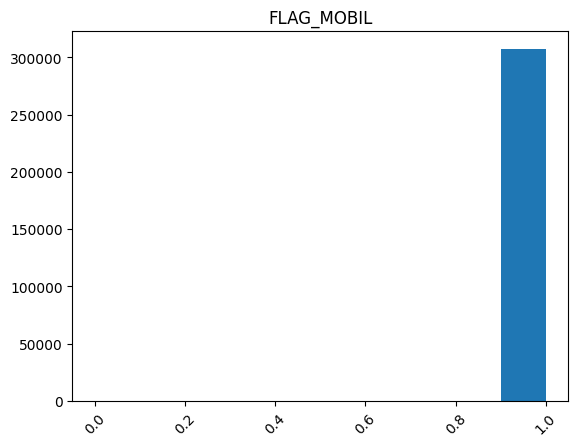

FLAG_EMP_PHONE


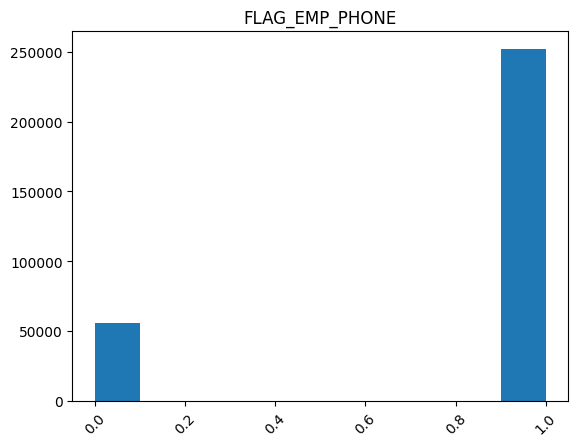

FLAG_WORK_PHONE


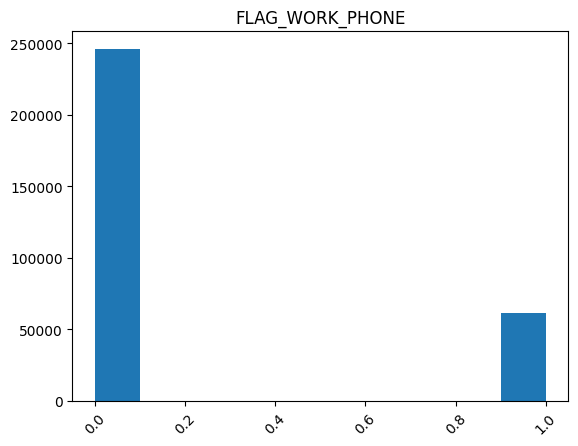

FLAG_CONT_MOBILE


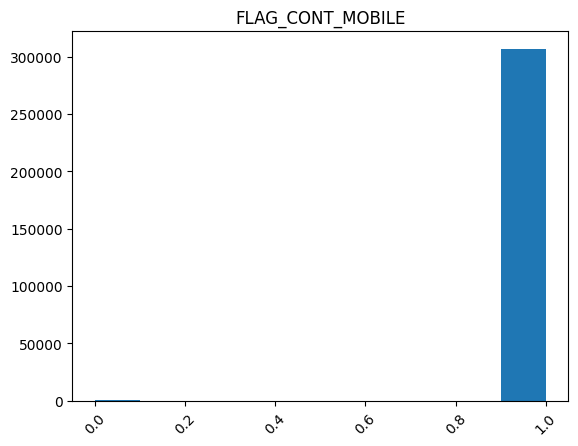

FLAG_PHONE


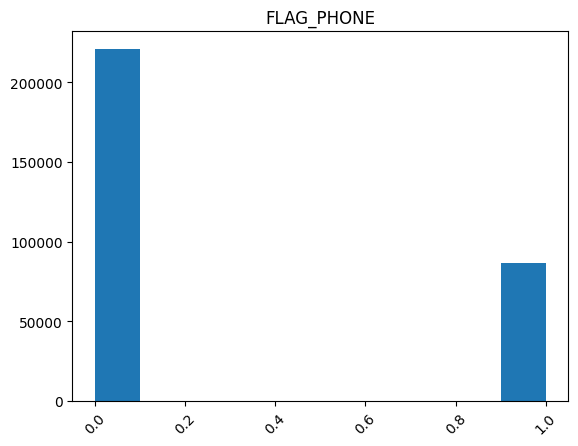

FLAG_EMAIL


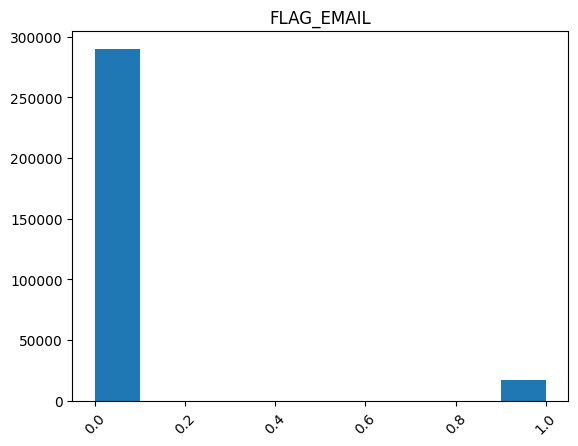

REGION_RATING_CLIENT


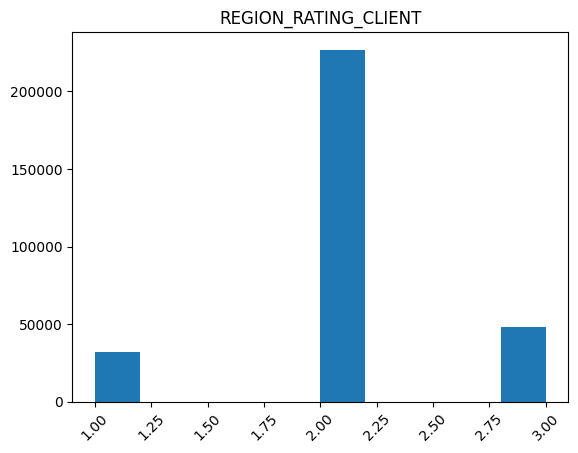

REGION_RATING_CLIENT_W_CITY


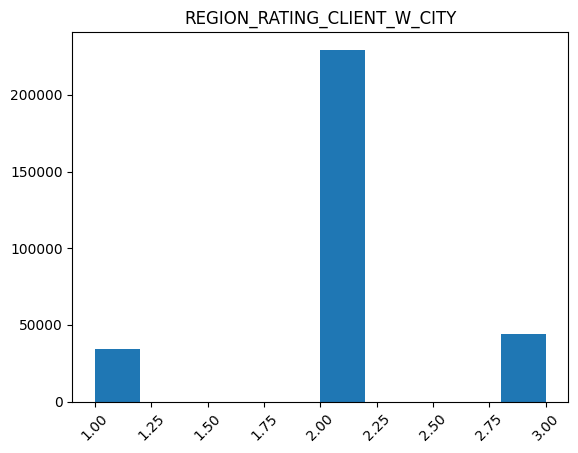

WEEKDAY_APPR_PROCESS_START


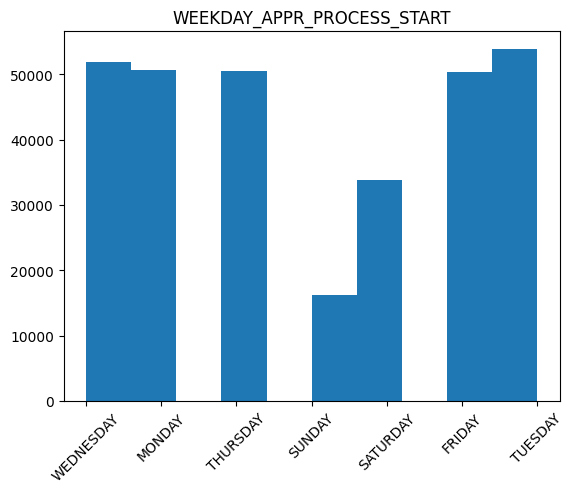

HOUR_APPR_PROCESS_START


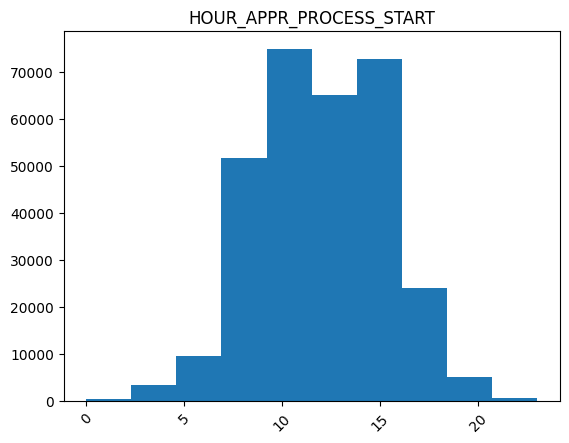

REG_REGION_NOT_LIVE_REGION


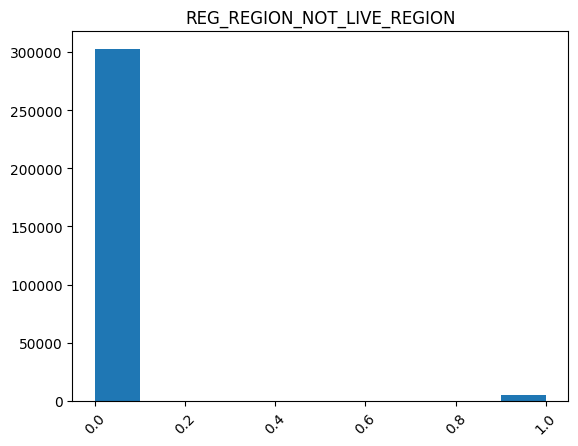

REG_REGION_NOT_WORK_REGION


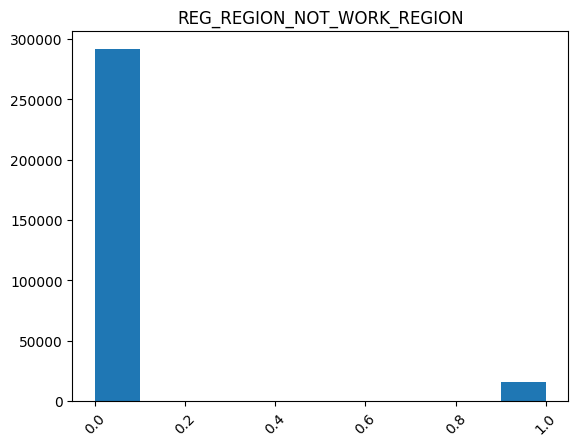

LIVE_REGION_NOT_WORK_REGION


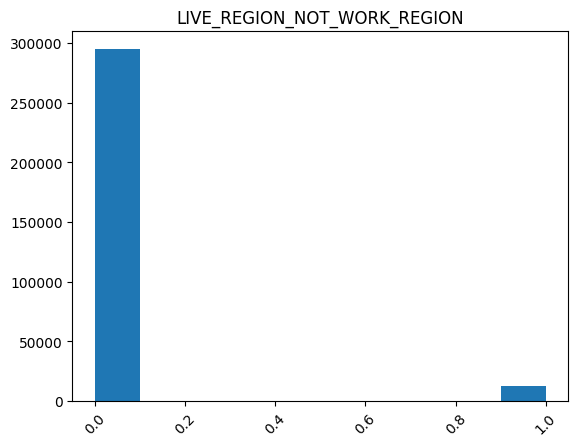

REG_CITY_NOT_LIVE_CITY


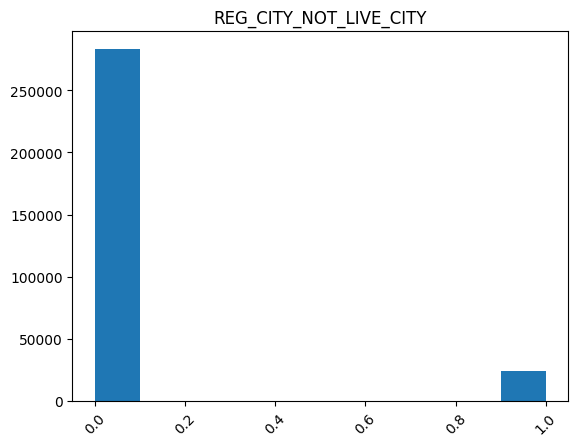

REG_CITY_NOT_WORK_CITY


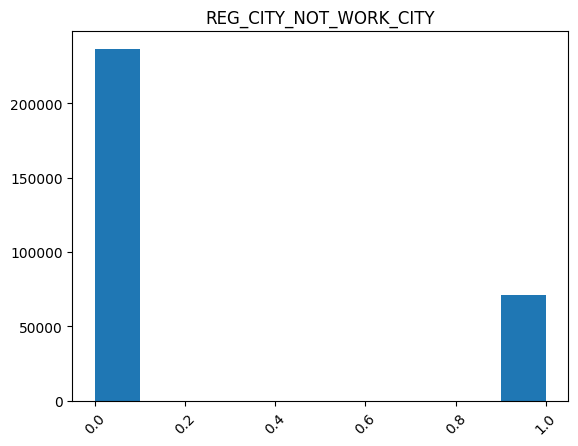

LIVE_CITY_NOT_WORK_CITY


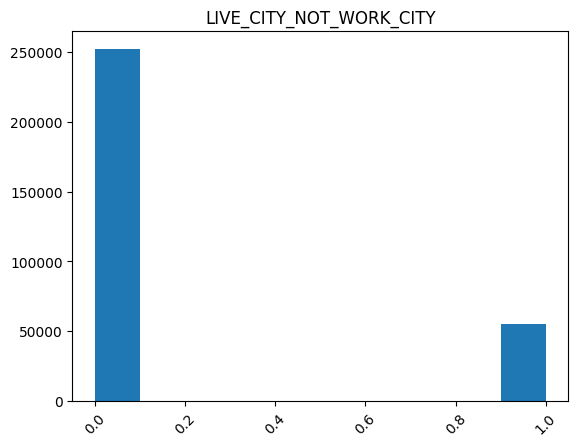

ORGANIZATION_TYPE


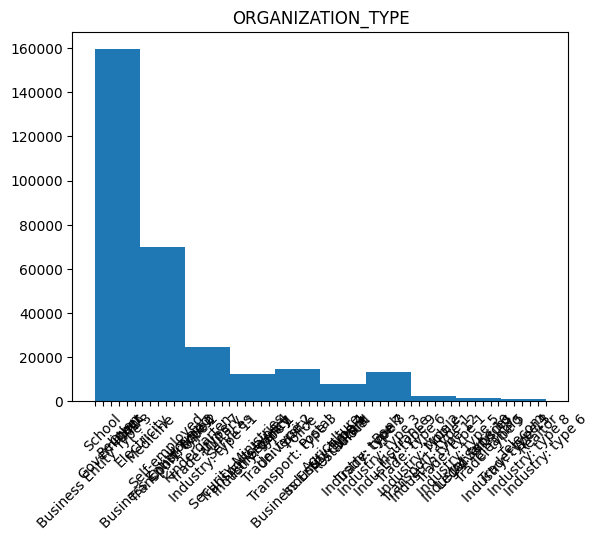

FLAG_DOCUMENT_2


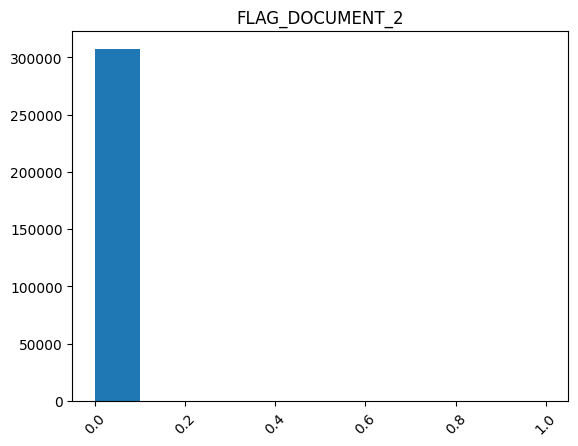

FLAG_DOCUMENT_3


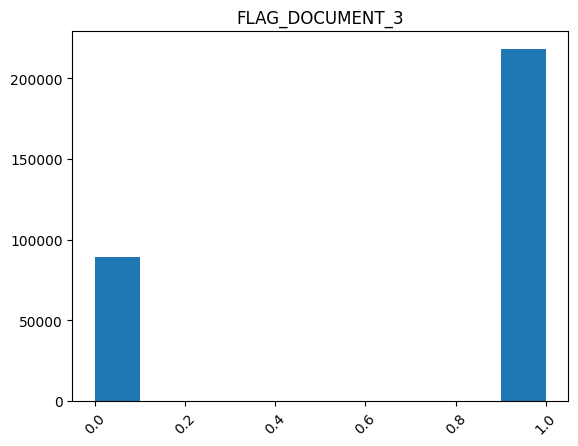

FLAG_DOCUMENT_4


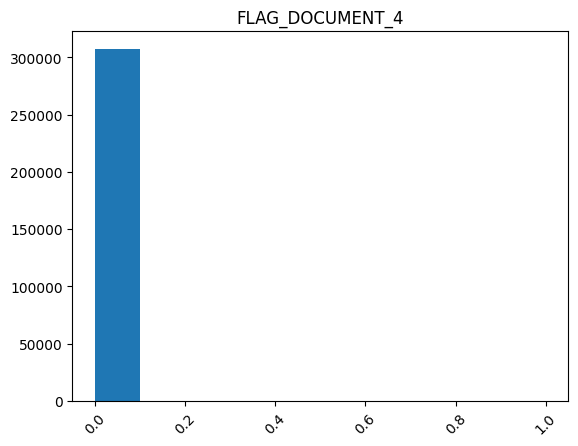

FLAG_DOCUMENT_5


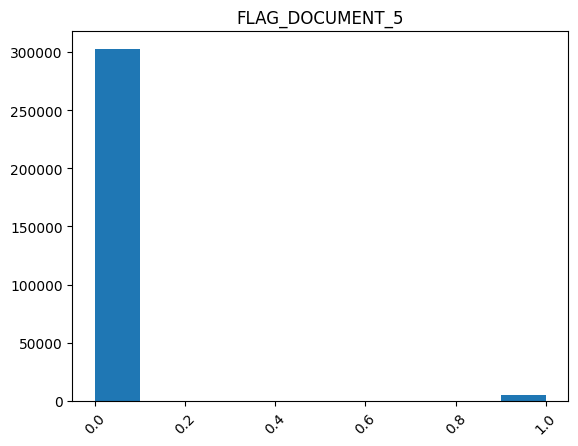

FLAG_DOCUMENT_6


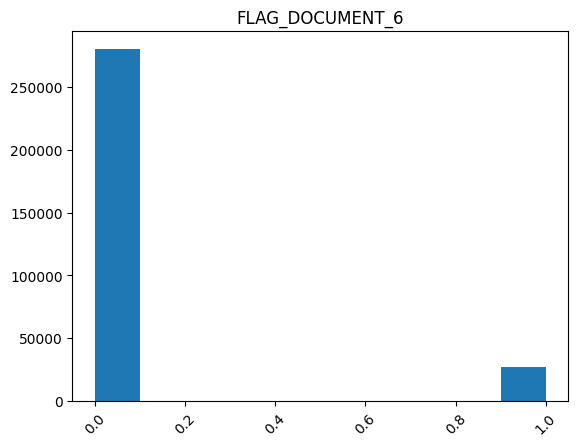

FLAG_DOCUMENT_7


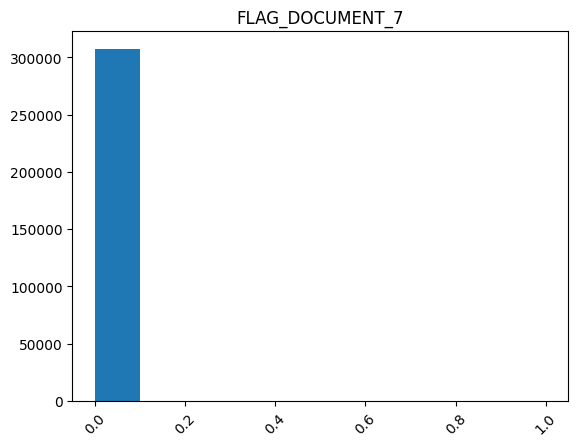

FLAG_DOCUMENT_8


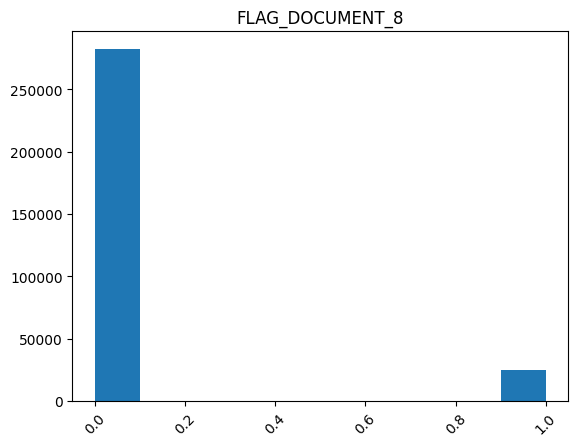

FLAG_DOCUMENT_9


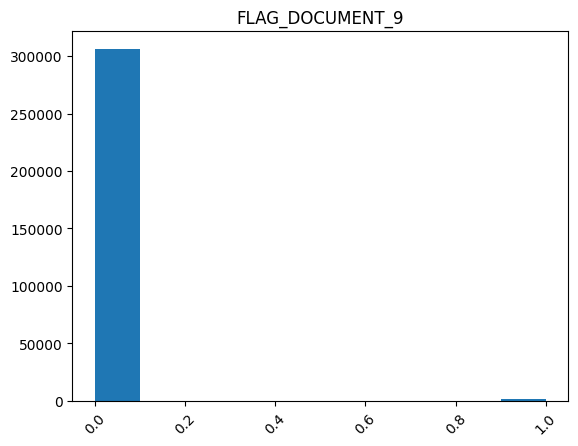

FLAG_DOCUMENT_10


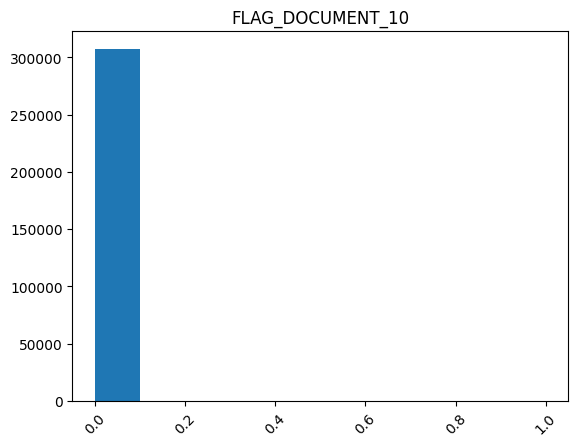

FLAG_DOCUMENT_11


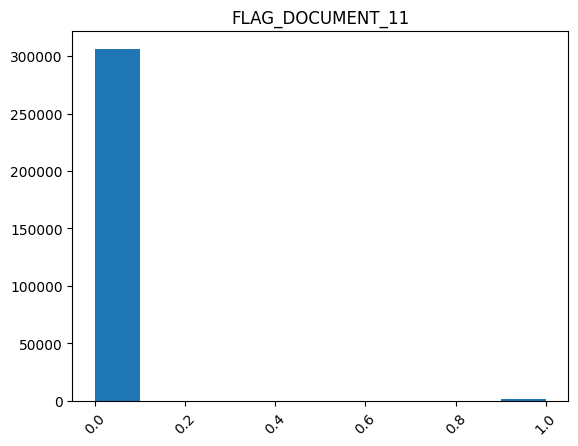

FLAG_DOCUMENT_12


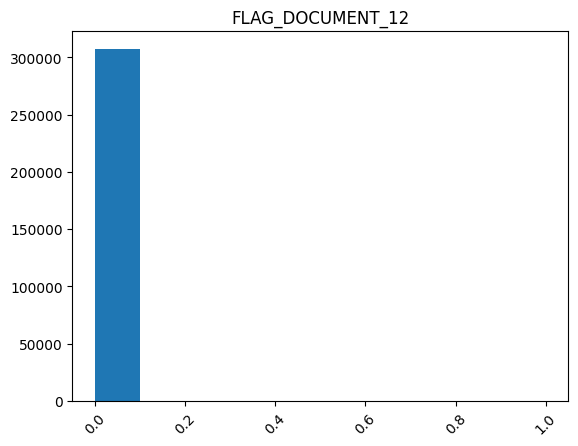

FLAG_DOCUMENT_13


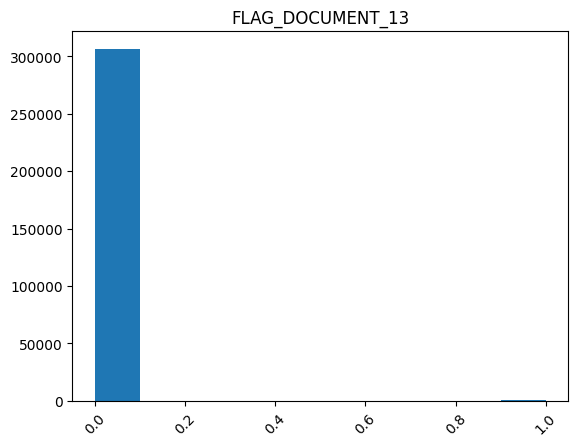

FLAG_DOCUMENT_14


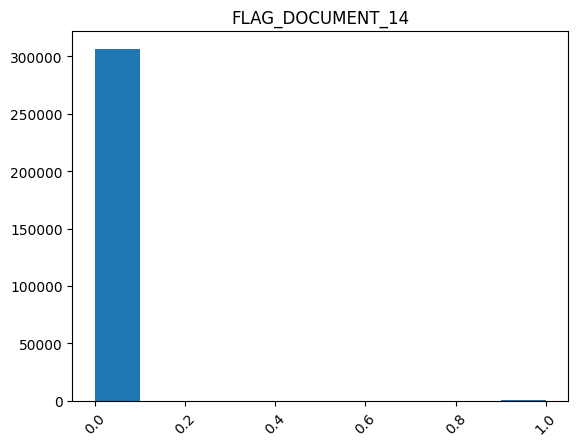

FLAG_DOCUMENT_15


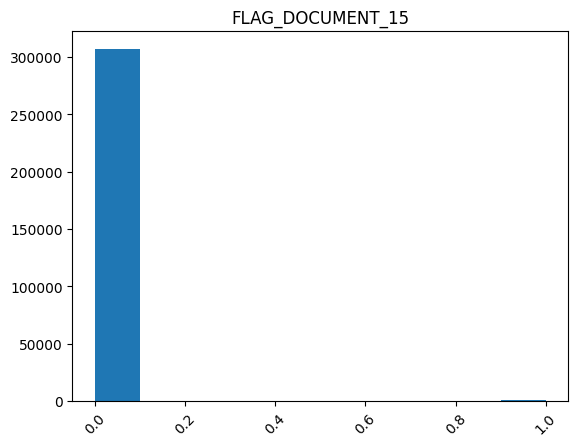

FLAG_DOCUMENT_16


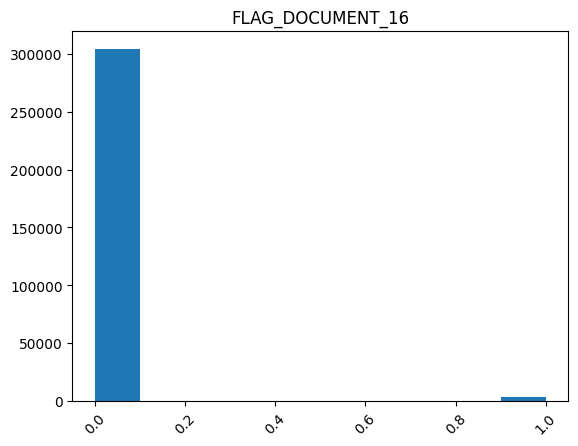

FLAG_DOCUMENT_17


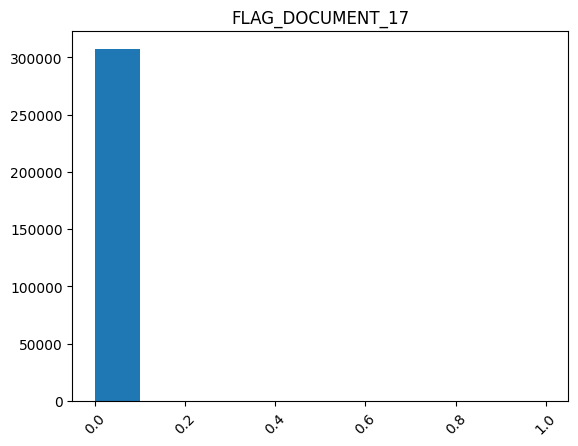

FLAG_DOCUMENT_18


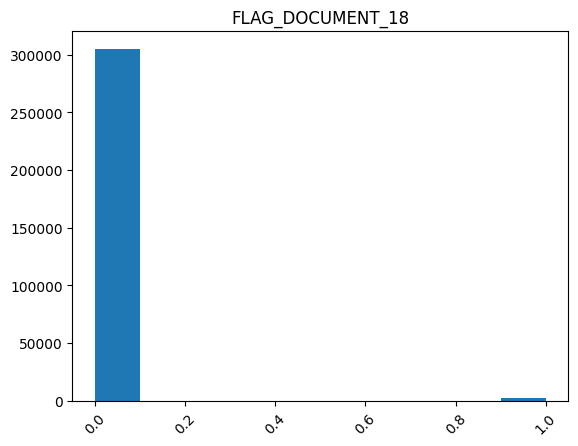

FLAG_DOCUMENT_19


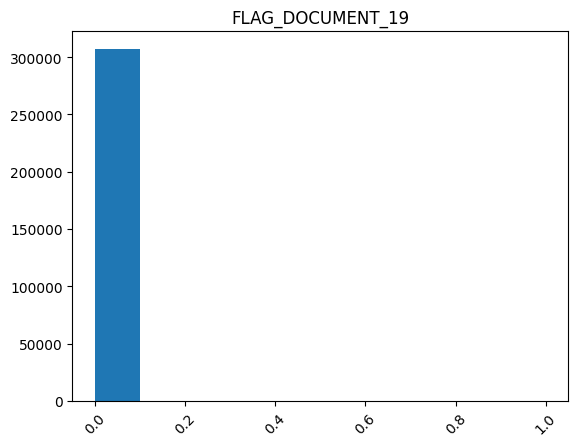

FLAG_DOCUMENT_20


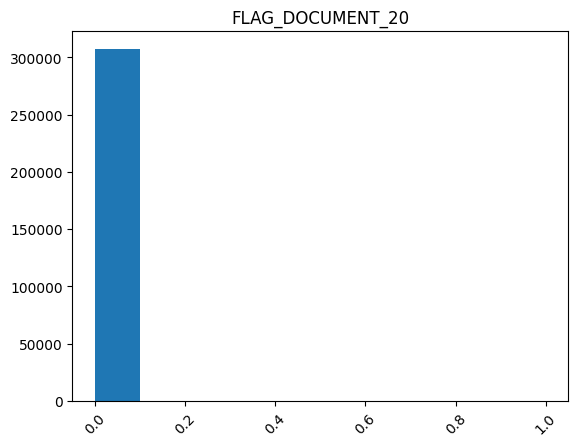

FLAG_DOCUMENT_21


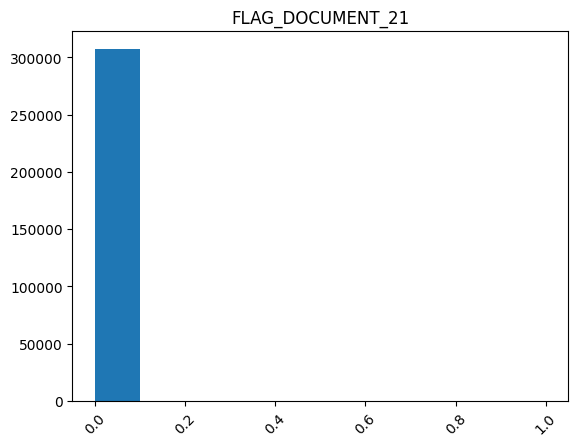

In [49]:
for col_name in df.columns:
    print(col_name)
    show_histogram(df, col_name)

### 3.2 Correlation matrix

/Users/app245/Library/CloudStorage/GoogleDrive-angelpavonperez@gmail.com/My Drive/PhD/Work/PhD/experiments/Covariance/visualization.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


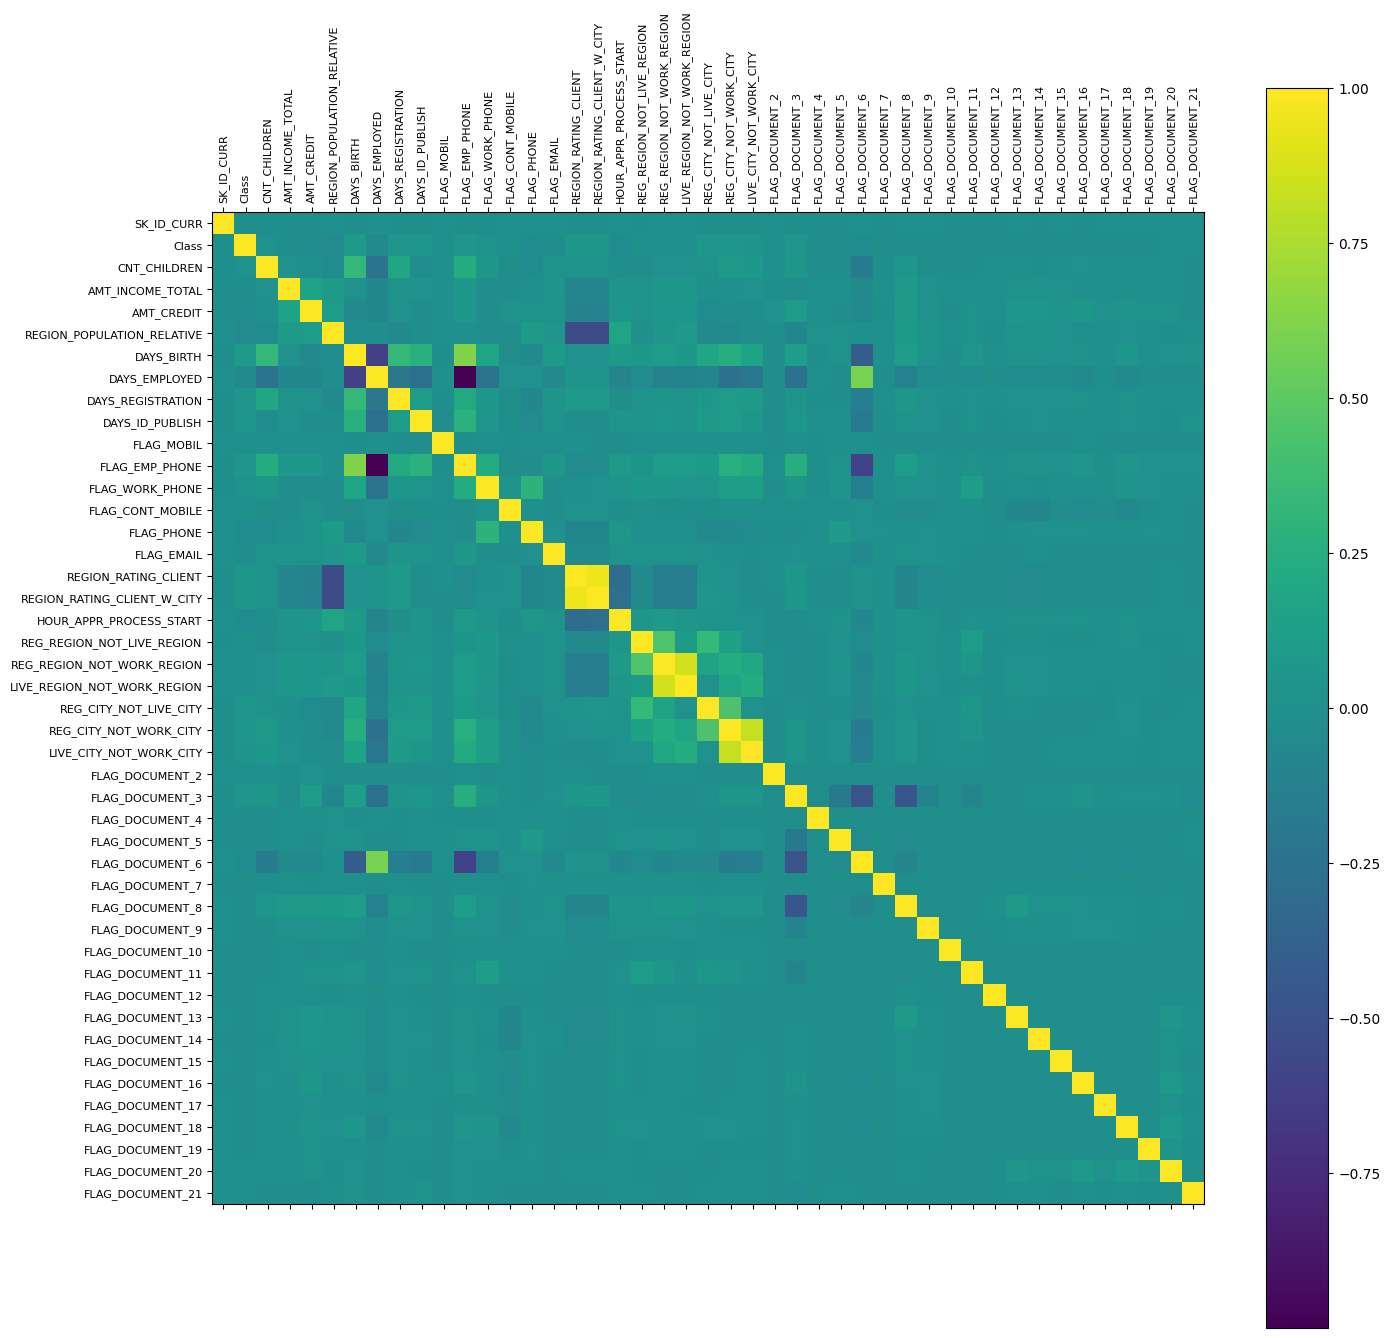

In [50]:
show_correlation_matrix(df, size=[150,150], fontsize=8)

### 3.3 Comparing males and females

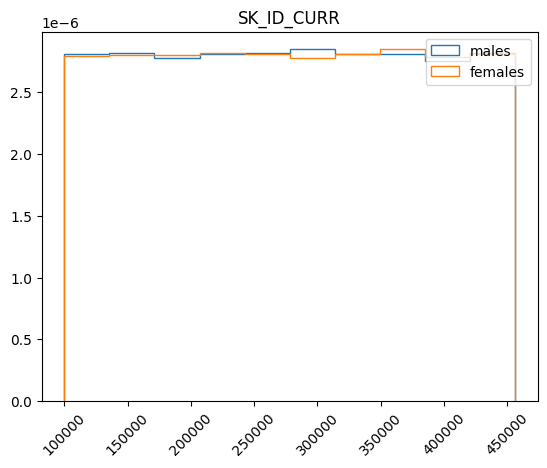

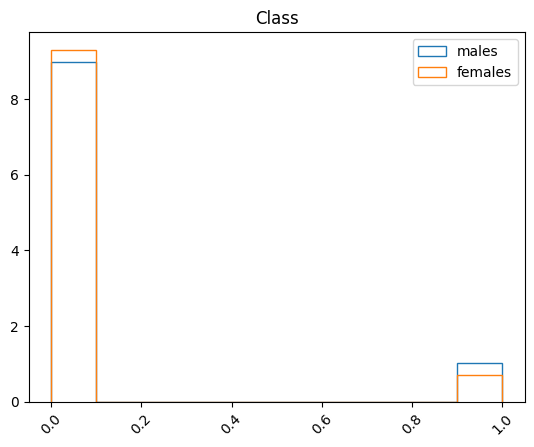

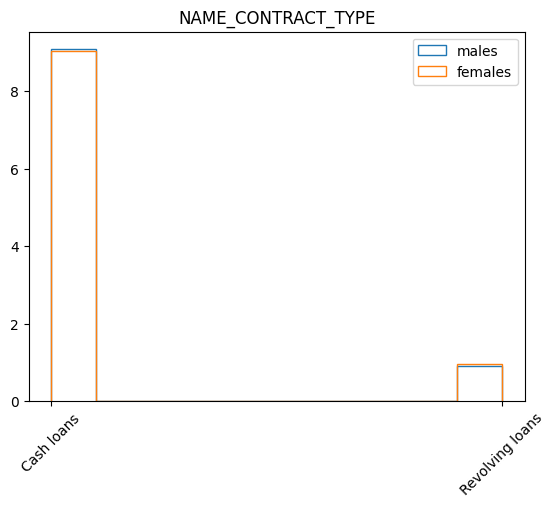

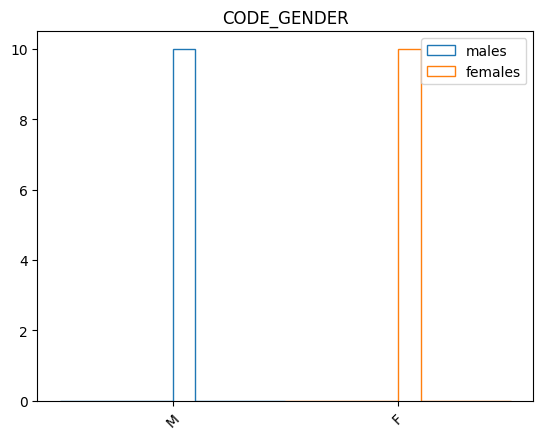

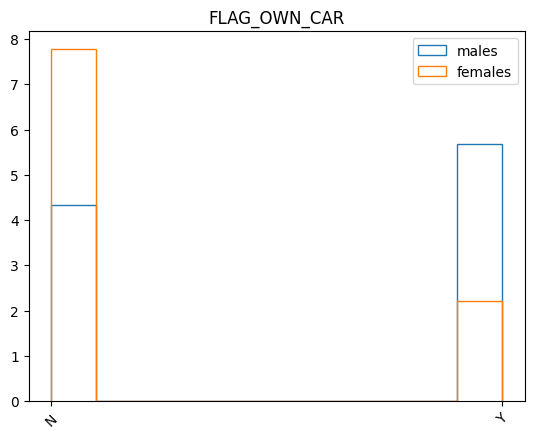

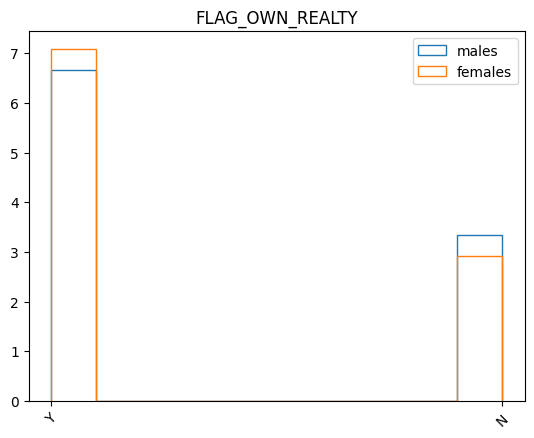

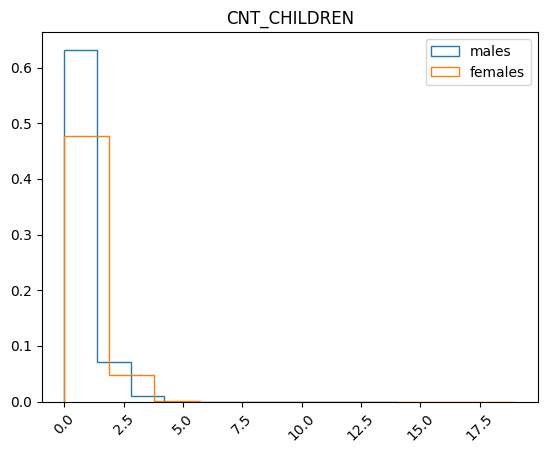

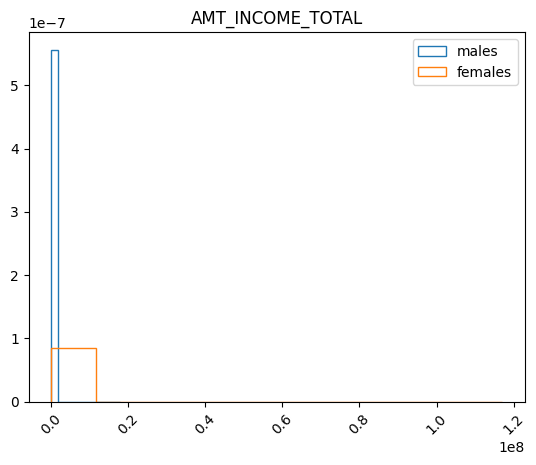

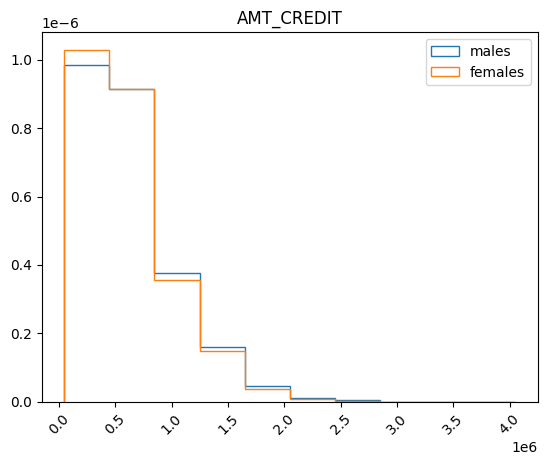

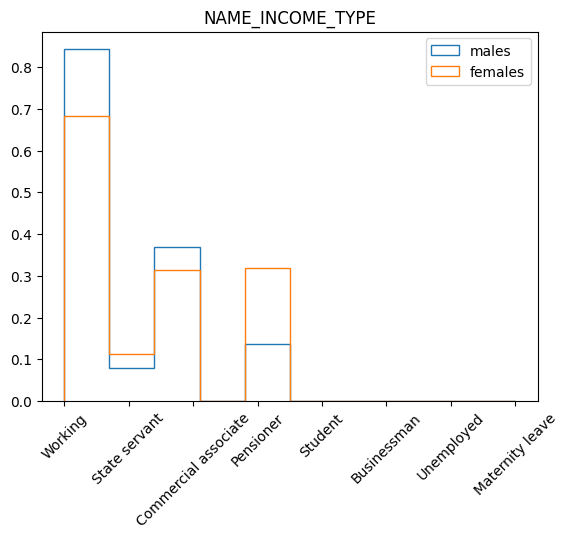

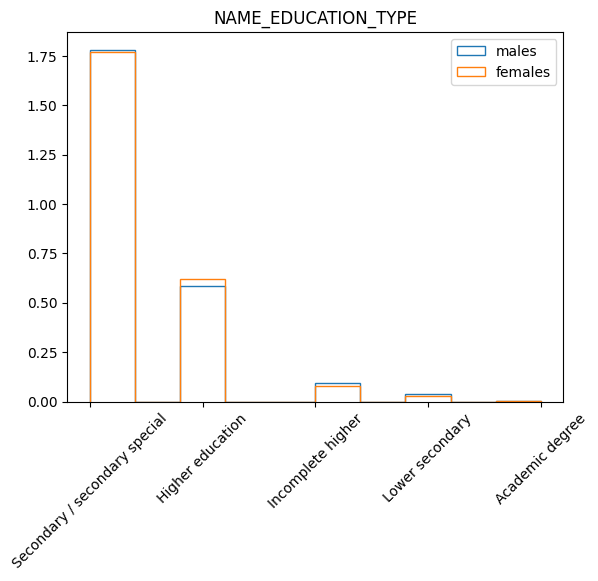

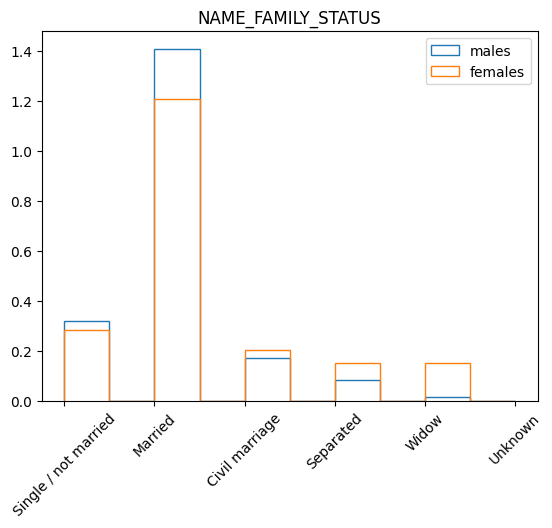

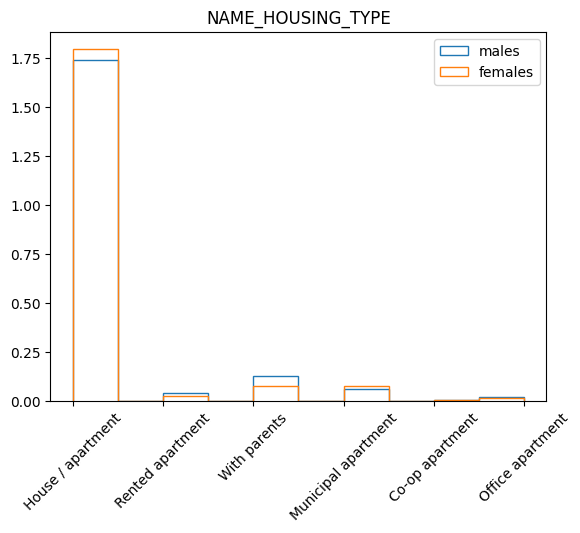

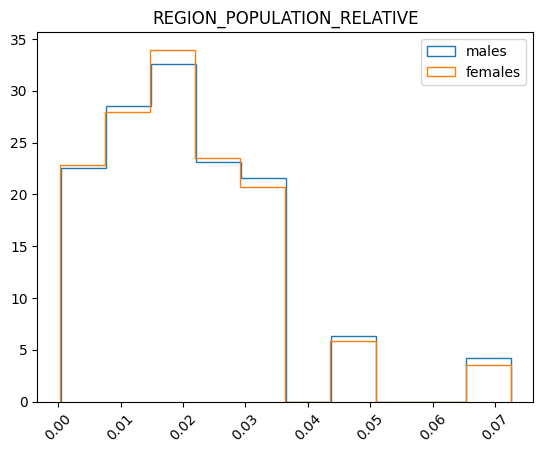

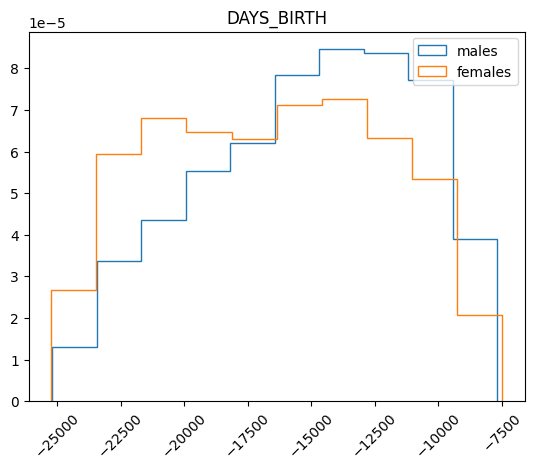

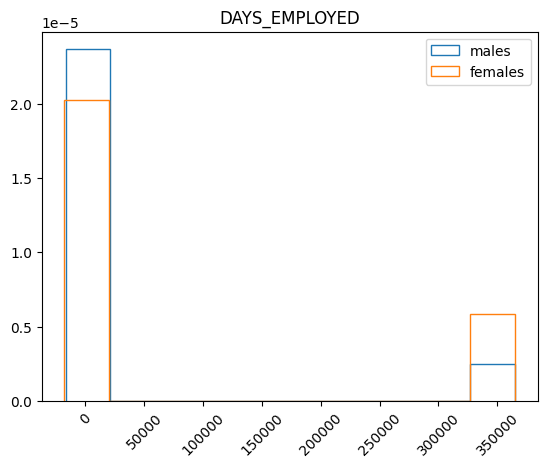

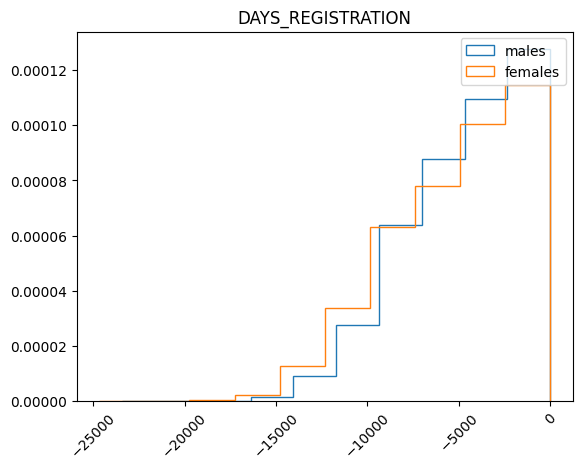

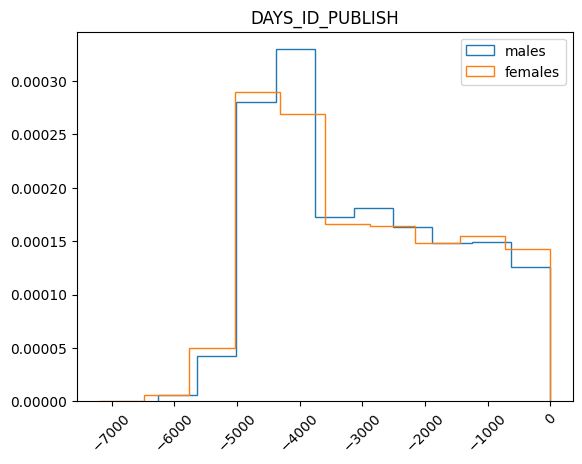

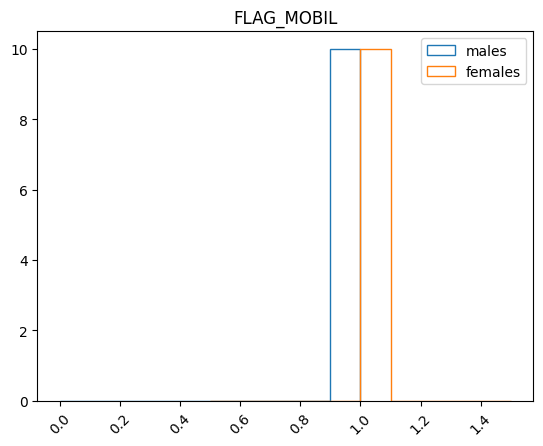

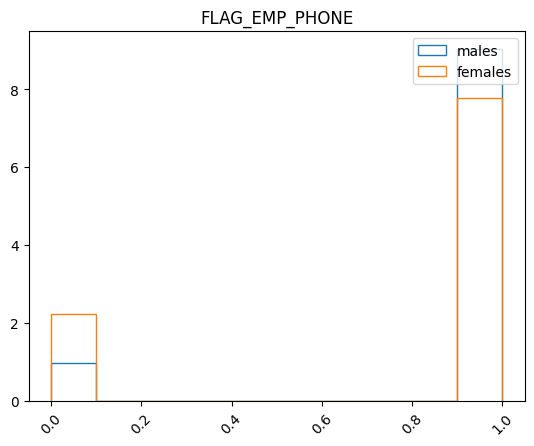

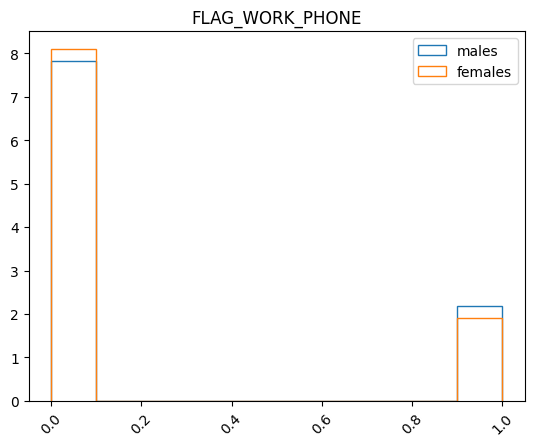

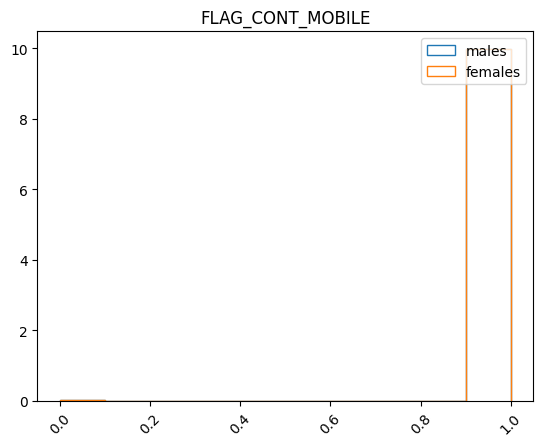

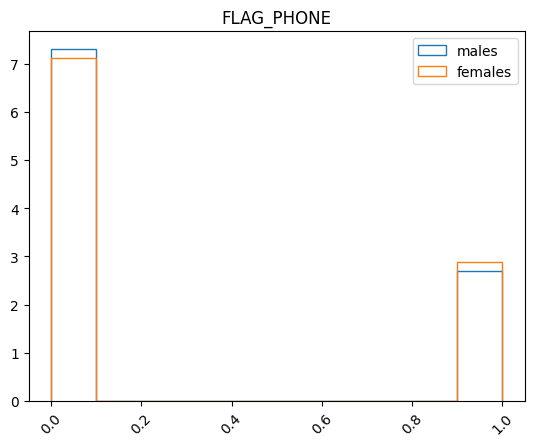

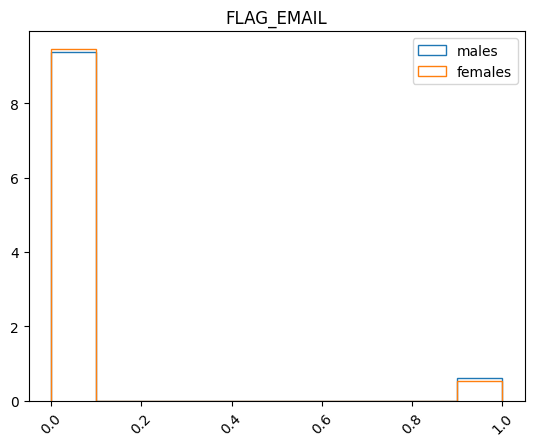

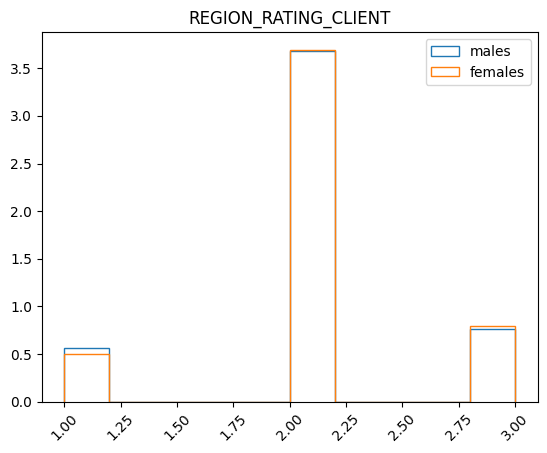

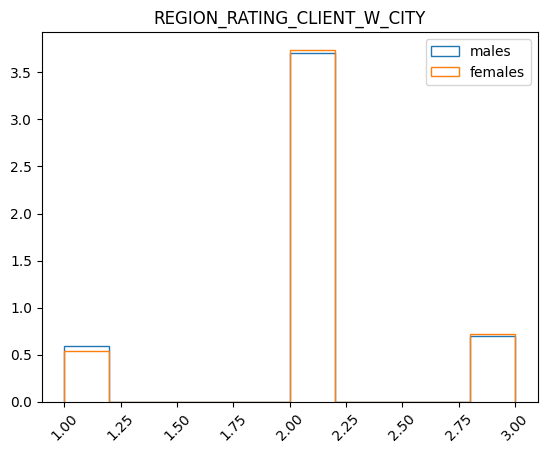

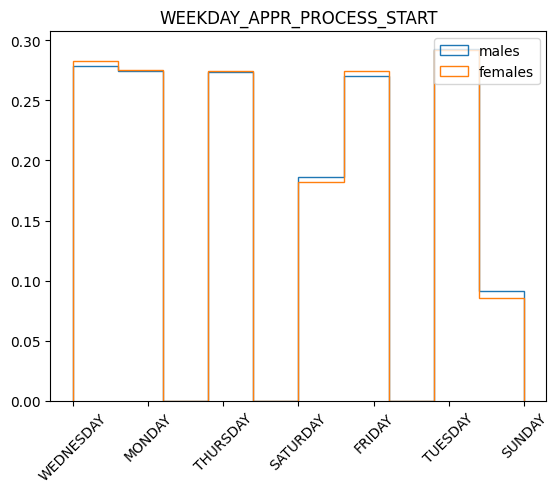

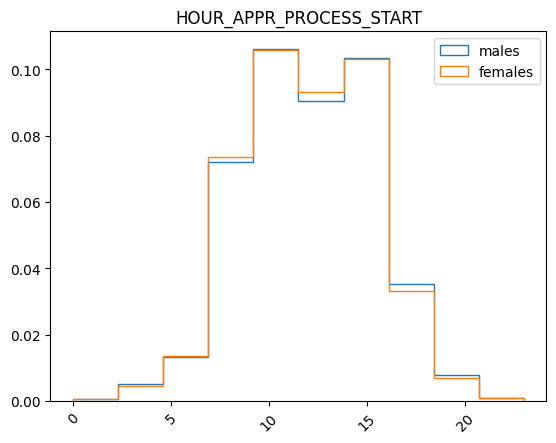

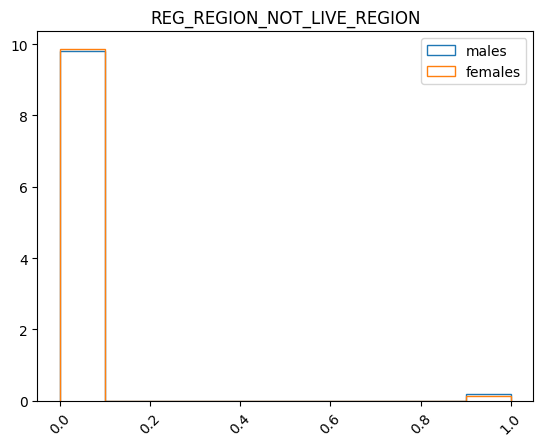

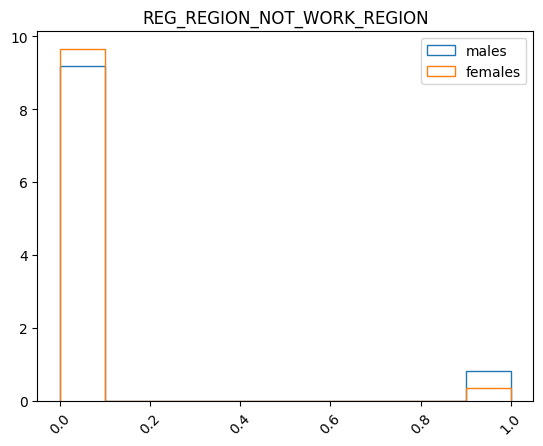

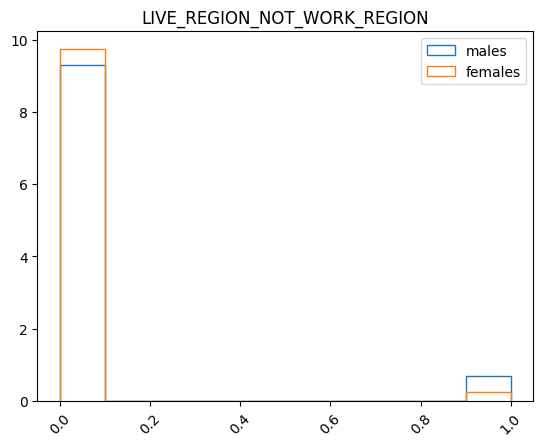

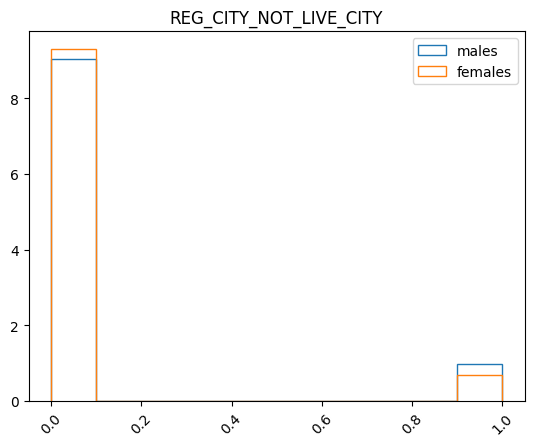

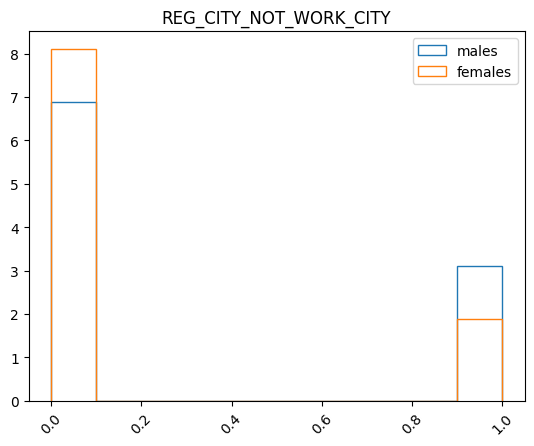

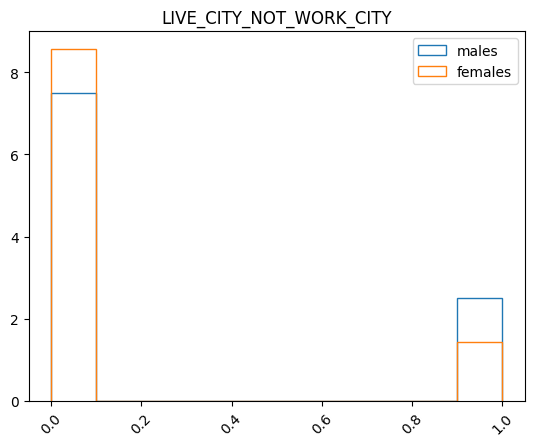

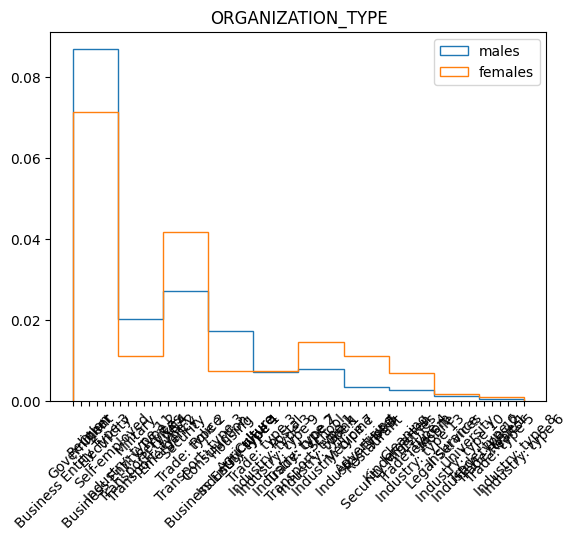

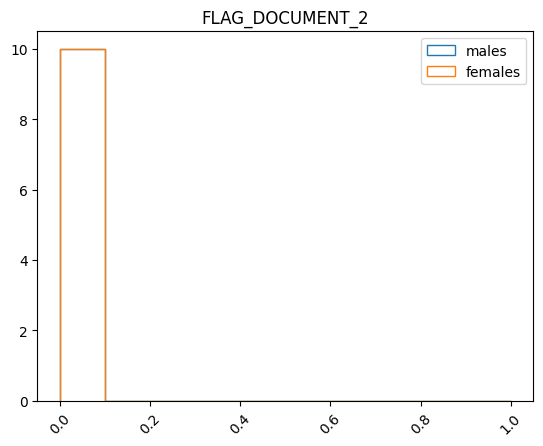

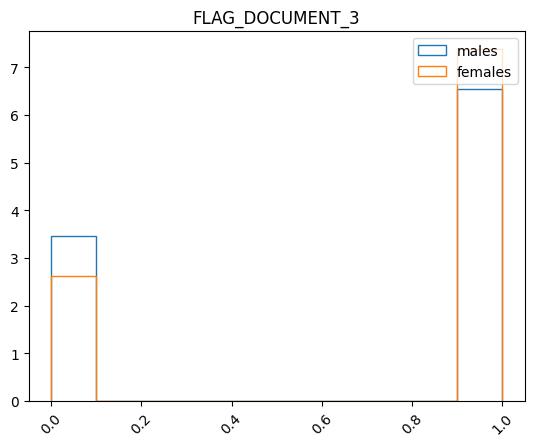

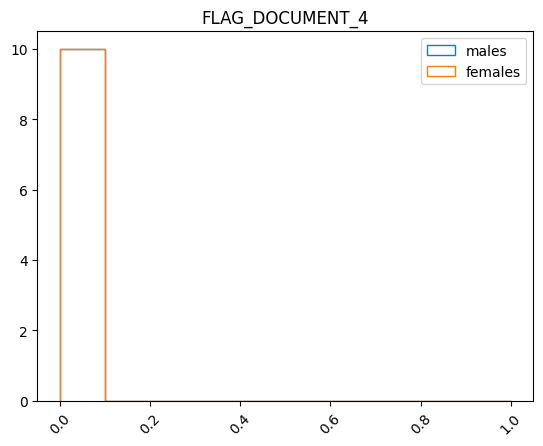

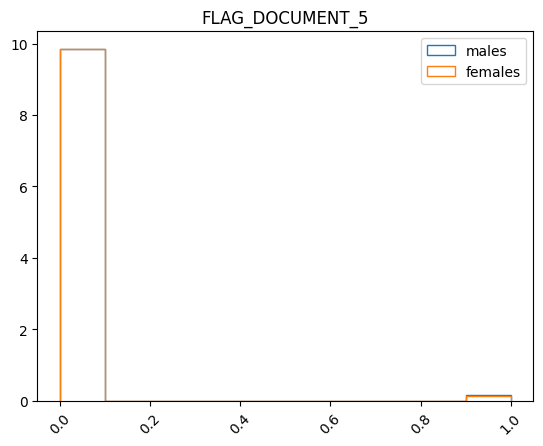

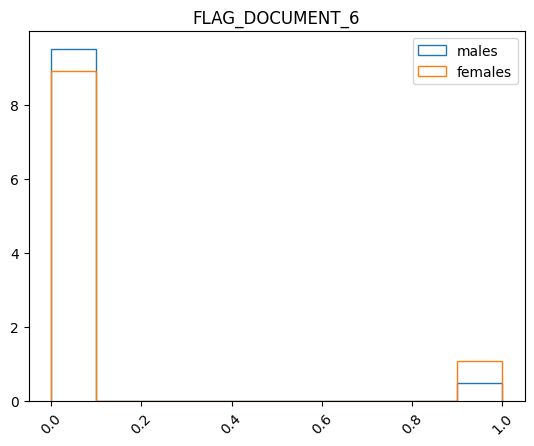

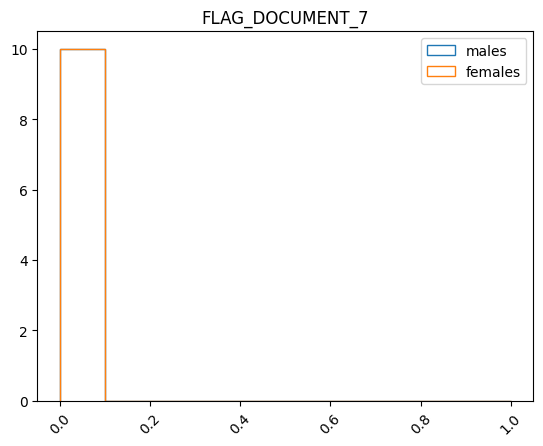

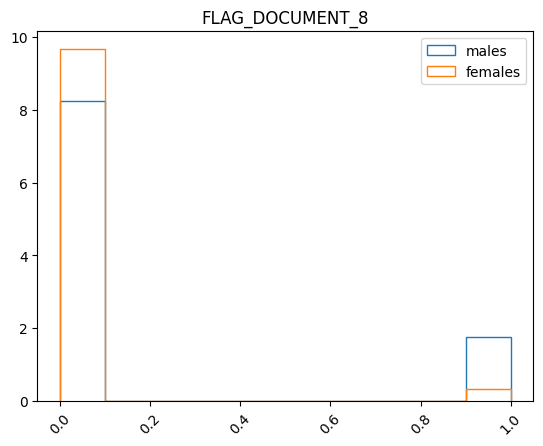

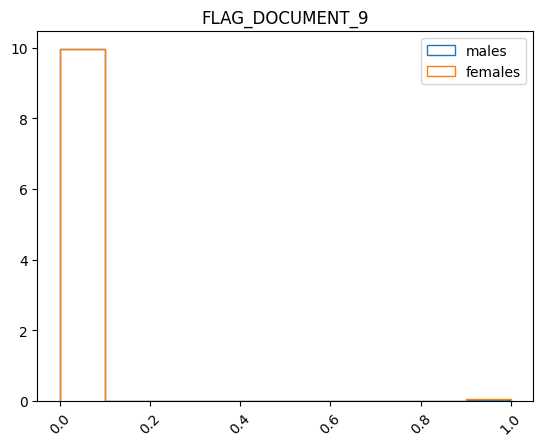

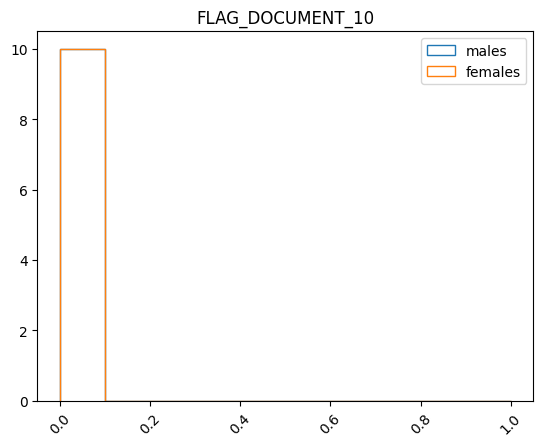

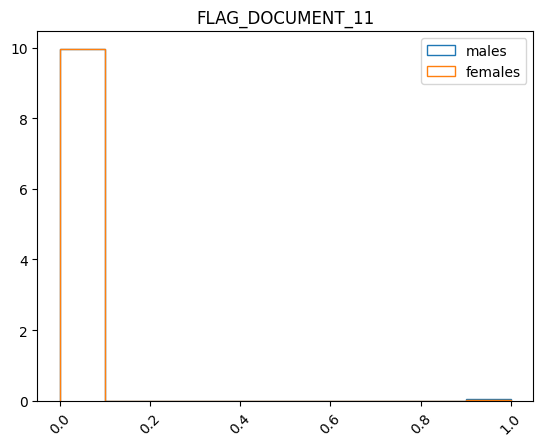

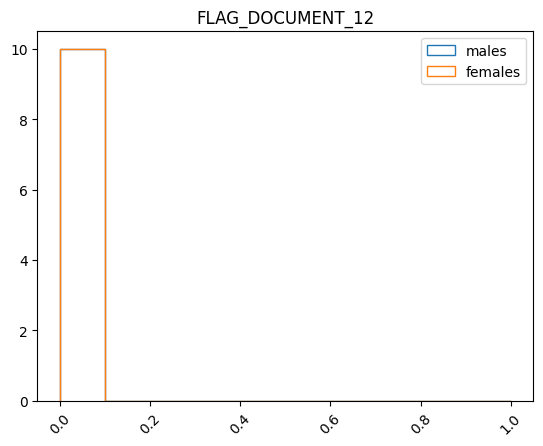

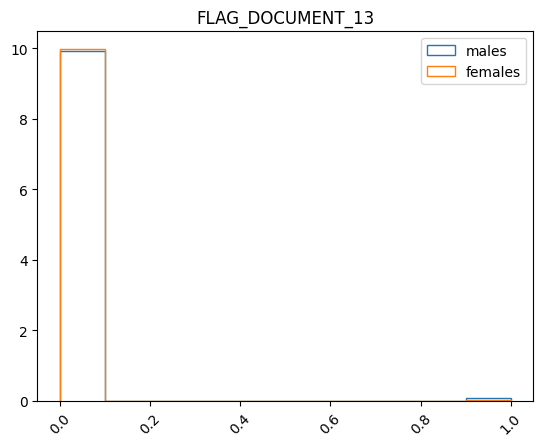

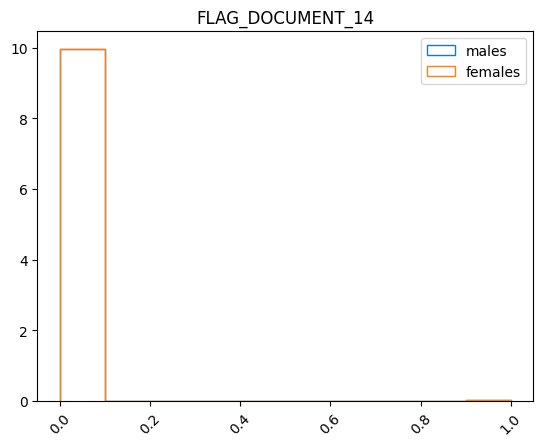

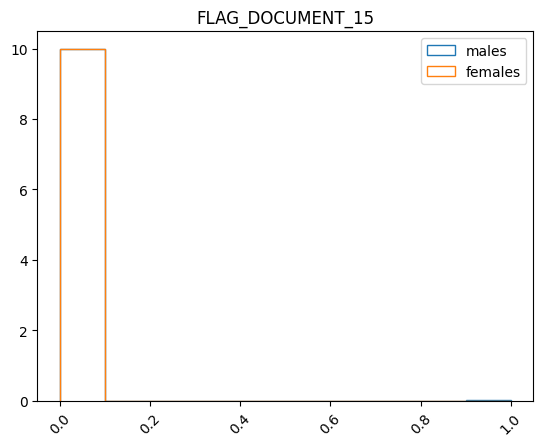

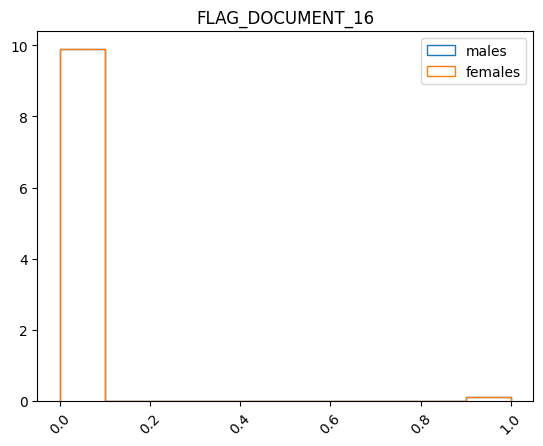

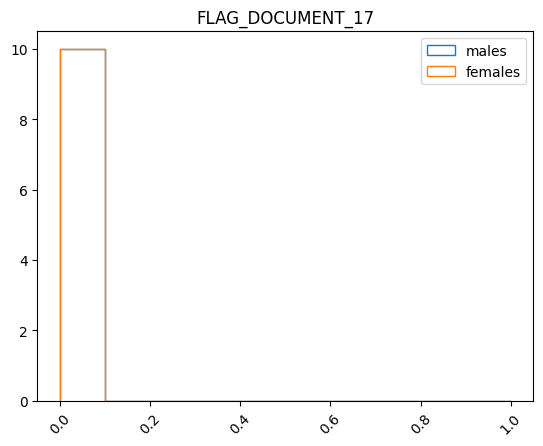

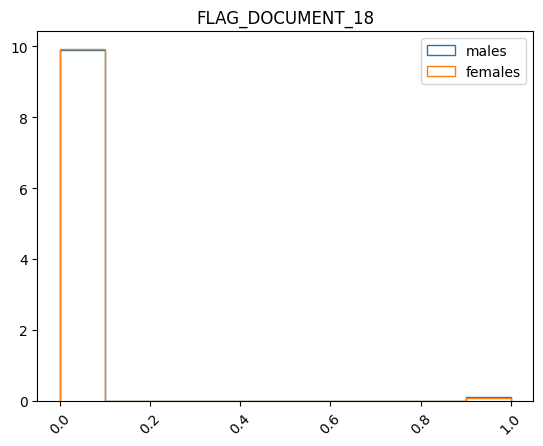

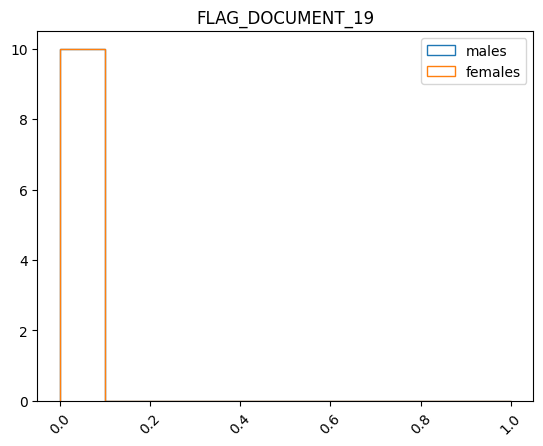

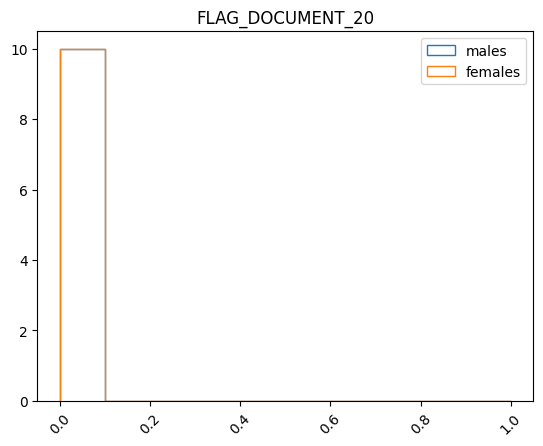

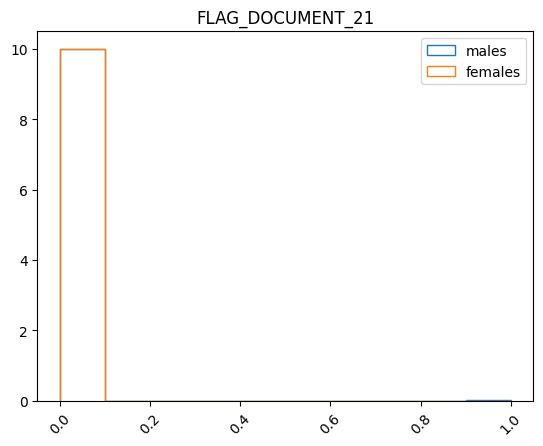

In [51]:
for col_name in df.columns:
    compare_histogram(df_males,df_females, col_name)

### 3.4 Statistical tests

In [104]:
df4chi = get_df4chi(df, dataset='home')
df4chi

SK_ID_CURR     Class NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002  Rejected         Cash loans        male            N   
1           100003   Acepted         Cash loans      female            N   
2           100004   Acepted    Revolving loans        male            Y   
3           100006   Acepted         Cash loans      female            N   
4           100007   Acepted         Cash loans        male            N   
...            ...       ...                ...         ...          ...   
307506      456251   Acepted         Cash loans        male            N   
307507      456252   Acepted         Cash loans      female            N   
307508      456253   Acepted         Cash loans      female            N   
307509      456254  Rejected         Cash loans      female            N   
307510      456255   Acepted         Cash loans      female            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

            NAME_INCOME_TYPE  ... FLAG_DOCUMENT_12 FLAG_DOCUMENT_13  \
0                    Working  ...                0                0   
1              State servant  ...                0                0   
2                    Working  ...                0                0   
3                    Working  ...                0                0   
4                    Working  ...                0                0   
...                      ...  ...              ...              ...   
307506               Working  ...                0                0   
307507             Pensioner  ...                0                0   
307508               Working  ...                0                0   
307509  Commercial associate  ...                0                0   
307510  Commercial associate  ...                0                0   

       FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     0                 0                 0                 0   
...                 ...               ...               ...               ...   
307506                0                 0                 0                 0   
307507                0                 0                 0                 0   
307508                0                 0                 0                 0   
307509                0                 0                 0                 0   
307510                0                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0                 0  
1                      0                 0                 0                 0  
2                      0                 0                 0                 0  
3                      0                 0                 0                 0  
4                      

In [105]:
bool_cols = [col for col in df4chi if len(set(df4chi[col])) == 2]
for col in bool_cols:
    df4chi[col] = df4chi[col].astype('object')

#### 3.4.1 Mann-Whitney U test

In [106]:
get_mannwhitneyu(df4chi, class_name = 'CODE_GENDER', alpha = 0.01)

({'AMT_INCOME_TOTAL': 0.0,
  'DAYS_BIRTH': 0.0,
  'DAYS_REGISTRATION': 3.332145530721814e-292,
  'CNT_CHILDREN': 3.830567143157786e-168,
  'DAYS_EMPLOYED': 2.2151243421393234e-161,
  'AMT_CREDIT': 1.3106922955525649e-25,
  'REGION_RATING_CLIENT': 9.449062445907797e-23,
  'REGION_RATING_CLIENT_W_CITY': 1.966068087195339e-21,
  'REGION_POPULATION_RELATIVE': 3.003384611252852e-06,
  'HOUR_APPR_PROCESS_START': 0.00025551476473187654},
 {'DAYS_ID_PUBLISH': 0.01050812854105344, 'SK_ID_CURR': 0.6822712042495194})

#### 3.4.2 Chi Square test

In [55]:
get_chi2(df4chi, class_name = 'CODE_GENDER', alpha = 0.01)

({'CODE_GENDER': 0.0,
  'FLAG_OWN_CAR': 0.0,
  'NAME_INCOME_TYPE': 0.0,
  'NAME_FAMILY_STATUS': 0.0,
  'FLAG_EMP_PHONE': 0.0,
  'REG_REGION_NOT_WORK_REGION': 0.0,
  'LIVE_REGION_NOT_WORK_REGION': 0.0,
  'REG_CITY_NOT_WORK_CITY': 0.0,
  'LIVE_CITY_NOT_WORK_CITY': 0.0,
  'ORGANIZATION_TYPE': 0.0,
  'FLAG_DOCUMENT_3': 0.0,
  'FLAG_DOCUMENT_6': 0.0,
  'FLAG_DOCUMENT_8': 0.0,
  'NAME_HOUSING_TYPE': 3.2620012200911406e-289,
  'Class': 4.394091339983112e-202,
  'REG_CITY_NOT_LIVE_CITY': 1.1882192456641419e-157,
  'FLAG_OWN_REALTY': 1.179527055217664e-133,
  'FLAG_DOCUMENT_13': 3.9224002085655644e-111,
  'FLAG_WORK_PHONE': 5.456118795054094e-79,
  'NAME_EDUCATION_TYPE': 1.390292375504768e-44,
  'FLAG_DOCUMENT_21': 1.580544170439592e-39,
  'REG_REGION_NOT_LIVE_REGION': 2.4775192384814723e-39,
  'FLAG_DOCUMENT_18': 9.554202909166753e-35,
  'FLAG_DOCUMENT_15': 9.275164395707512e-31,
  'FLAG_PHONE': 3.0547626613476115e-27,
  'FLAG_EMAIL': 5.455653369303027e-24,
  'NAME_CONTRACT_TYPE': 1.2447387077

#### 3.4.3 Plot results

In [56]:
def plot_dictionaries(list_dict, title='chart plot', labels = []):

    fig, axes = plt.subplots(1, len(list_dict), figsize=(15,4), gridspec_kw={'width_ratios': [3, 1]})
    fig.suptitle(title)
        
    for i,ax in enumerate(axes):
        d = list_dict[i]
        ax.bar(range(len(d)), list(d.values()), align='center')
        ax.set_title(labels[i])

        if labels[i] == 'Chi-Square':
            ax.set_yticks(np.arange(0, 1.1, 0.1))
        elif labels[i] == 'Mann-Whitney':
            ax.set_yticks(np.arange(0, 1.1, 0.1))
        else:
            ax.set_yticks(np.arange(0, 0.04, 0.01))
            
        ax.set_xticks(range(len(d.keys())))
        ax.set_xticklabels(d.keys(), rotation=90)
        
    for ax in axes.flat:
        ax.set(xlabel='attributes', ylabel='p-value')

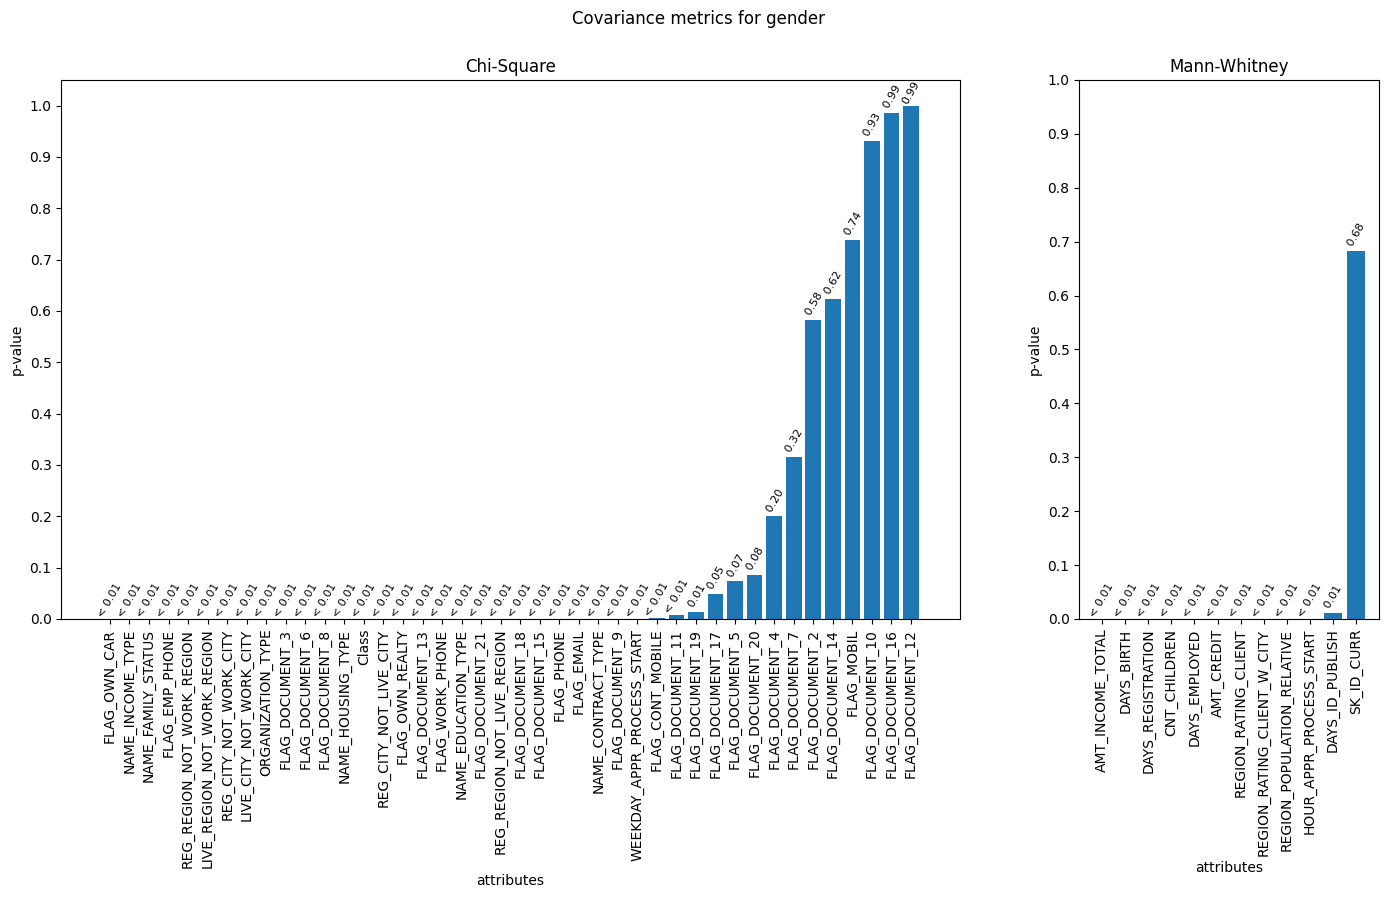

In [111]:
def plot_dictionaries(list_dict, title='chart plot', labels=[]):
    fig, axes = plt.subplots(1, len(list_dict), figsize=(17, 7), gridspec_kw={'width_ratios': [3, 1]})
    fig.suptitle(title)
    for i, ax in enumerate(axes):
        d = list_dict[i]
        x = range(len(d))
        y = list(d.values())
        ax.bar(x, y, align='center')
        ax.set_title(labels[i])
        if labels[i] == 'Chi-Square':
            ax.set_yticks(np.arange(0, 1.1, 0.1))
        elif labels[i] == 'Mann-Whitney':
            ax.set_yticks(np.arange(0, 1.1, 0.1))
        else:
            ax.set_yticks(np.arange(0, 0.04, 0.01))
        ax.set_xticks(x)
        ax.set_xticklabels(d.keys(), rotation=90)
        for j, v in enumerate(y):
            if v == 1:
                ax.text(j, v, "0.99", ha='center', va='bottom', fontsize=8, rotation=60)
            elif v >= 0.01 and v != 1:
                ax.text(j, v, f" {v:.2f}", ha='center', va='bottom', fontsize=8, rotation=60)
            else:
                ax.text(j, v, "< 0.01", ha='center', va='bottom', fontsize=8, rotation=60)
                
    for ax in axes.flat:
        ax.set(xlabel='attributes', ylabel='p-value')

plot_dictionaries([chi2, mannU], labels=['Chi-Square', 'Mann-Whitney'], title = 'Covariance metrics for gender')

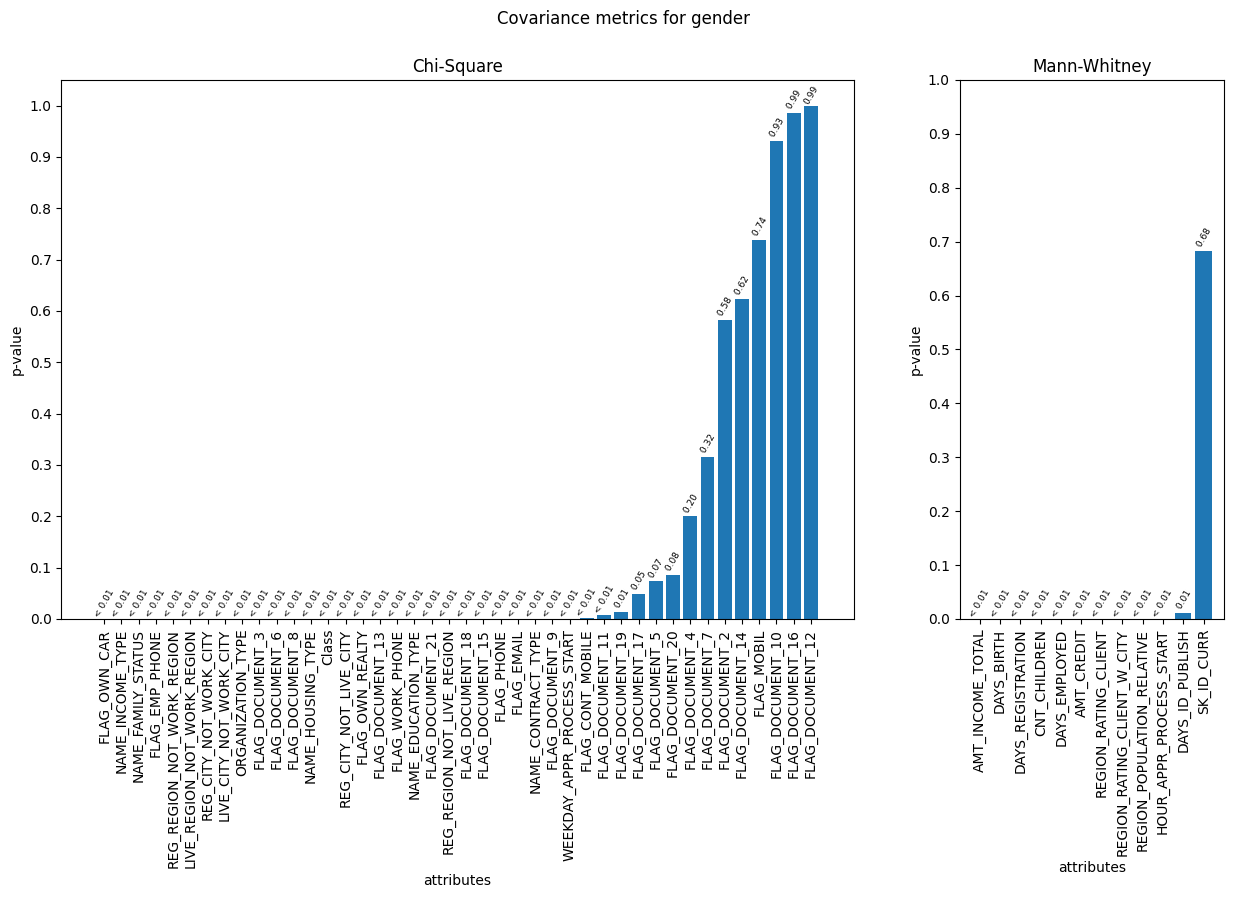

In [107]:
dep, ind = get_chi2(df4chi, class_name = 'CODE_GENDER', alpha = 0.01)
chi2 = {**dep, **ind}
del chi2['CODE_GENDER']

dep, ind = get_mannwhitneyu(df4chi, class_name = 'CODE_GENDER', alpha = 0.01)
mannU = {**dep, **ind}
plot_dictionaries([chi2, mannU], labels=['Chi-Square', 'Mann-Whitney'], title = 'Covariance metrics for gender')

### 3.5 Statistical tests for processed data

In [59]:
df_kaggle = get_kaggle_processed_data()
df_kaggle = df_kaggle.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_kaggle

/Users/app245/Library/CloudStorage/GoogleDrive-angelpavonperez@gmail.com/My Drive/PhD/Work/PhD/experiments/Covariance/kaggle_home.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
/Users/app245/Library/CloudStorage/GoogleDrive-angelpavonperez@gmail.com/My Drive/PhD/Work/PhD/experiments/Covariance/kaggle_home.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bureau_avg = bureau.groupby('SK_ID_CURR').mean()
/Users/app245/Library/CloudStorage/GoogleDrive-angelpavonperez@gmail.com/My Drive/PhD/Work/PhD/experiments/Covariance/kaggle_home.py:

NAME_CONTRACT_TYPE  gender  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                        0       0             0                0   
1                        0       1             0                1   
2                        1       0             1                0   
3                        0       1             0                0   
4                        0       0             0                0   
...                    ...     ...           ...              ...   
307506                   0       0             0                1   
307507                   0       1             0                0   
307508                   0       1             0                0   
307509                   0       1             0                0   
307510                   0       1             0                1   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  NAME_TYPE_SUITE  ...  cc_bal_SK_DPD  \
0              351000.0                0  ...            NaN   
1             1129500.0                1  ...            NaN   
2              135000.0                0  ...            NaN   
3              297000.0                0  ...            0.0   
4              513000.0                0  ...            NaN   
...                 ...              ...  ...            ...   
307506         225000.0                0  ...            NaN   
307507         225000.0                0  ...            NaN   
307508         585000.0                0  ...            NaN   
307509         319500.0                0  ...            NaN   
307510         675000.0                0  ...            NaN   

        cc_bal_SK_DPD_DEF  cc_bal_NAME_CONTRACT_STATUS_Active  \
0                     NaN                                 NaN   
1                     NaN                                 NaN   
2                     NaN                                 NaN   
3                     0.0                                 1.0   
4                     NaN                                 NaN   
...                   ...                                 ...   
307506                NaN                                 NaN   
307507                NaN                                 NaN   
307508                NaN                                 NaN   
307509                NaN                                 NaN   
307510                NaN                                 NaN   

        cc_bal_NAME_CONTRACT_STATUS_Approved  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        0.0   
4                                        NaN   
...                                      ...   
307506                                   NaN   
307507                                   NaN   
307508                                   NaN   
307509                                   NaN   
307510                                   NaN   

        cc_bal_NAME_CONTRACT_STATUS_Completed  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         0.0   
4 

In [60]:
df_kaggle_p = df_kaggle.rename(columns={'gender': 'CODE_GENDER'})
df4chi_k = get_df4chi(fill_nan(df_kaggle_p), dataset='home')

In [61]:
bool_cols = [col for col in df4chi_k if len(set(df4chi_k[col])) == 2]
for col in bool_cols:
    df4chi_k[col] = df4chi_k[col].astype('object')

In [63]:
def plot_dictionary(d):
    plt.figure(figsize=(60, 7))
    plt.bar(range(len(d)), list(d.values()), align='center')
    plt.xticks(range(len(d)), list(d.keys()), rotation=90)
    plt.show()

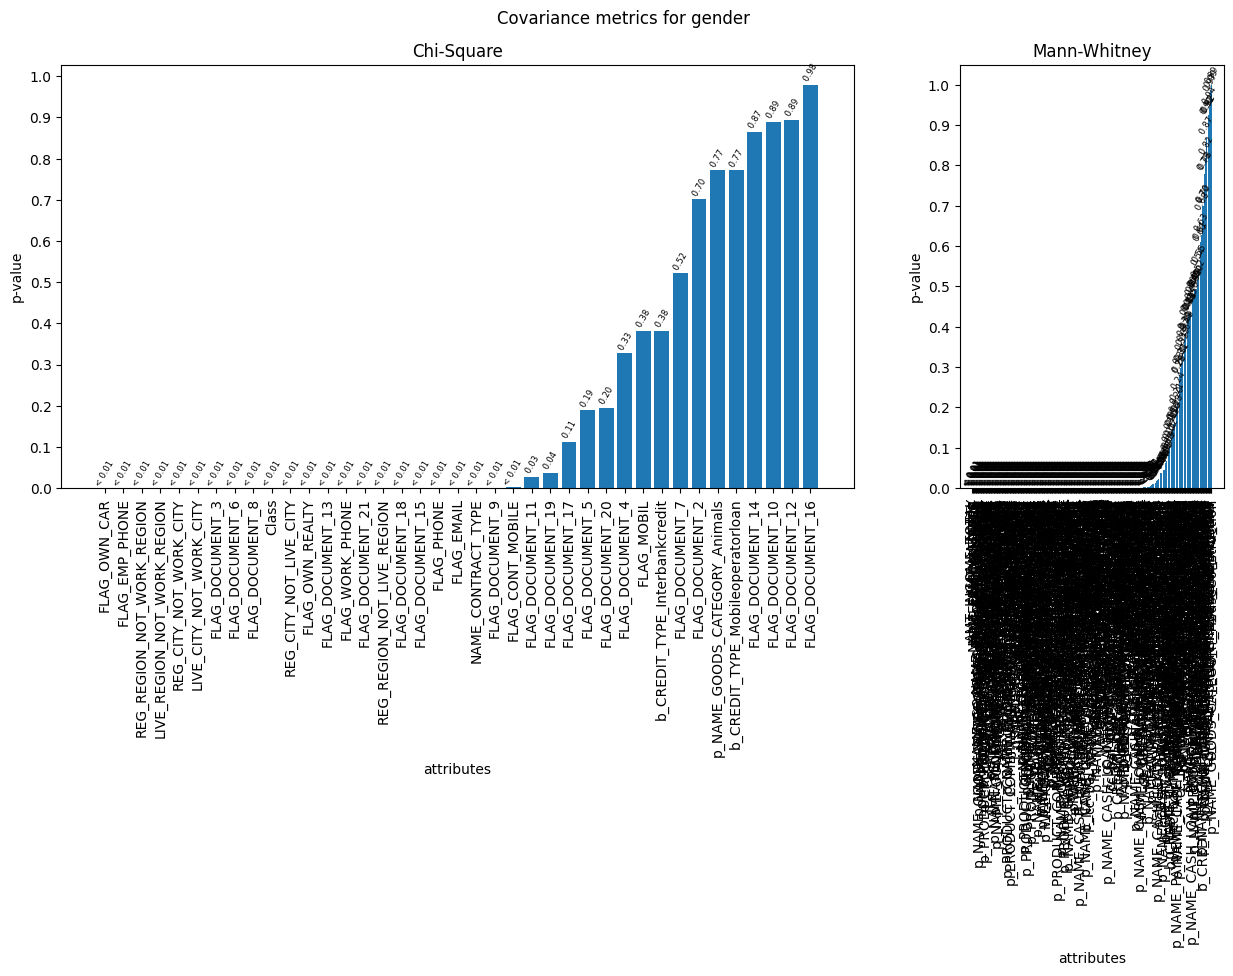

In [64]:
dep, ind = get_chi2(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)
chi2 = {**dep, **ind}
del chi2['CODE_GENDER']

dep, ind = get_mannwhitneyu(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)
mannU = {**dep, **ind}
plot_dictionaries([chi2, mannU], labels=['Chi-Square', 'Mann-Whitney'], title = 'Covariance metrics for gender')

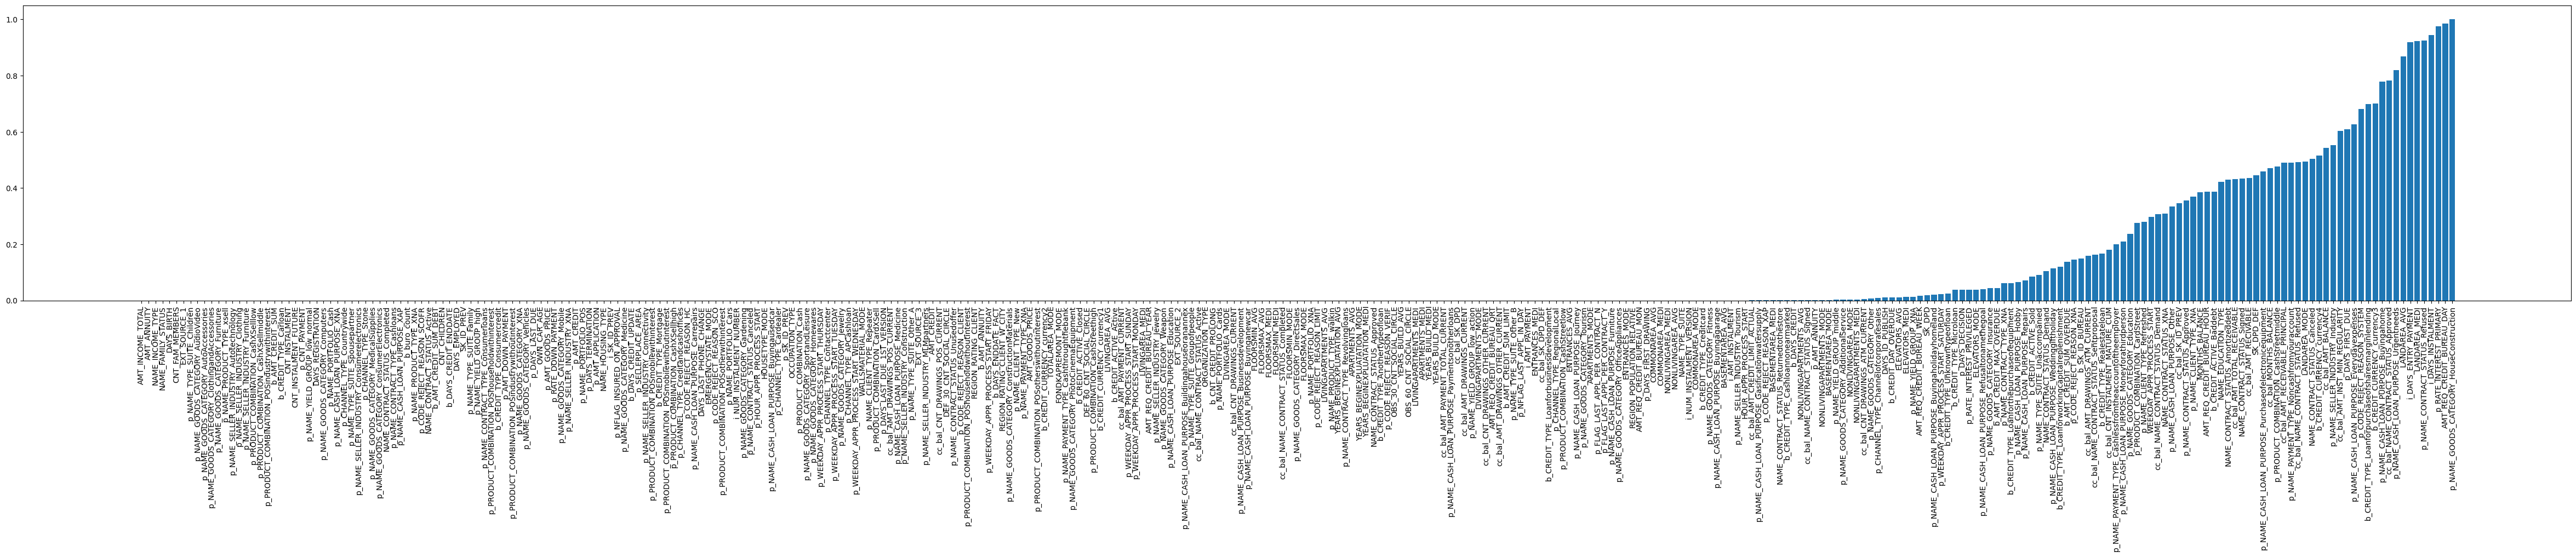

In [65]:
plot_dictionary(mannU)

### 3.6 Key variables to find gender

Experiment for finding the best explainable model for gender to explain relation with other attributes.

In [60]:
dependent_attributes, independent_attributes = get_chi2(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)
diff_dis_attributes, same_dis_attributes = get_mannwhitneyu(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)

dependent_attributes = {**dependent_attributes, **diff_dis_attributes}

attributes = [k for k,v in dependent_attributes.items() if k not in ['CODE_GENDER']]
df_kaggle_clean = fill_nan(df_kaggle_p)

df_kaggle_clean = df_kaggle_clean[df_kaggle_clean['CODE_GENDER'] != 2]

X_train, X_test, y_train, y_test = split_data(df_kaggle_clean, test_size = 0.20, y_name = 'CODE_GENDER', get_test = True)

cc = RandomUnderSampler(random_state=2)
X_res, y_res = cc.fit_resample(X_train, y_train)

clf = XGBClassifier()
clf = clf.fit(X_res[attributes], y_res)
y_pred = test_model(clf, X_test[attributes])

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.8309160677701538


In [55]:
# plt.figure(figsize=(17,10))
# tree.plot_tree(best_clf, class_names = ['males', 'females'], feature_names = best_attributes, 
#                filled = True, proportion = True, fontsize= 10)
# pass

In [14]:
print(df[df['CODE_GENDER'] == 'M']['CODE_GENDER'].count() / df['CODE_GENDER'].count())
print(df[df['CODE_GENDER'] == 'F']['CODE_GENDER'].count() / df['CODE_GENDER'].count())

0.34164306317497584
0.6583439291602576


**Check which attributes are the most common selected:**

In [ ]:
# # df2 = df.copy()

# df2 = ignore_attribute_n_values(df, n = 10)
# df4chi = ignore_attribute_n_values(df4chi, n = 10)

# dependent_attributes, independent_attributes = get_chi2(df4chi, class_name = 'CODE_GENDER', alpha = pow(10,-300))
# diff_dis_attributes, same_dis_attributes = get_mannwhitneyu(df4chi, class_name = 'CODE_GENDER', alpha = pow(10,-300))

# dependent_attributes = {**dependent_attributes, **diff_dis_attributes}

# attributes = [k for k,v in dependent_attributes.items()]
# df2 = process_data(df2[attributes], dataset_name='home')

# ba_dict = {}
# for i in range(100):
#     best_clf, best_attributes, best_acc = search_best_attributes(df2, class_name = 'gender')
    
#     for a in best_attributes:
#         if a in ba_dict:
#             ba_dict[a] += 1
#         else:
#             ba_dict[a] = 1
            
# {k: v for k, v in sorted(ba_dict.items(), key=lambda item: item[1], reverse=True)}

iteritems is deprecated and will be removed in a future version. Use .items instead.
iteritems is deprecated and will be removed in a future version. Use .items instead.
iteritems is deprecated and will be removed in a future version. Use .items instead.


In [ ]:
# df_original = ignore_attribute_n_values(df, n = 10)
# df_processed = process_data(df_original, dataset_name='home')
# numeric_columns = df_original.select_dtypes(include=np.number).columns.tolist()
# decoding(df, df_processed, ignore_columns = ['gender', 'Class'] + numeric_columns)

### 3.7 Key variables to find gender after removing dependent variables

Experiment for seeing the accuracy difference for guessing gender when correlated attributes are delated.

In [59]:
dependent_attributes, independent_attributes = get_chi2(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)
diff_dis_attributes, same_dis_attributes = get_mannwhitneyu(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)

independent_attributes = {**independent_attributes, **same_dis_attributes}

attributes = [k for k,v in independent_attributes.items() if k not in ['CODE_GENDER']]
df_kaggle_clean = fill_nan(df_kaggle_p)

df_kaggle_clean = df_kaggle_clean[df_kaggle_clean['CODE_GENDER'] != 2]

X_train, X_test, y_train, y_test = split_data(df_kaggle_clean, test_size = 0.20, y_name = 'CODE_GENDER', get_test = True)

cc = RandomUnderSampler(random_state=2)
X_res, y_res = cc.fit_resample(X_train, y_train)

clf = XGBClassifier()
clf = clf.fit(X_res[attributes], y_res)
y_pred = test_model(clf, X_test[attributes])

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.5630711196383857


In [ ]:
# plt.figure(figsize=(17,10))
# tree.plot_tree(best_clf, class_names = ['males', 'females'], feature_names = best_attributes, 
#                filled = True, proportion = True, fontsize= 10)
# pass

## 4. Models experiments

In [66]:
df_kaggle = get_kaggle_processed_data() # Processing data using all tables
df_kaggle = df_kaggle.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_kaggle

/Users/app245/Library/CloudStorage/GoogleDrive-angelpavonperez@gmail.com/My Drive/PhD/Work/PhD/experiments/Covariance/kaggle_home.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
/Users/app245/Library/CloudStorage/GoogleDrive-angelpavonperez@gmail.com/My Drive/PhD/Work/PhD/experiments/Covariance/kaggle_home.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bureau_avg = bureau.groupby('SK_ID_CURR').mean()
/Users/app245/Library/CloudStorage/GoogleDrive-angelpavonperez@gmail.com/My Drive/PhD/Work/PhD/experiments/Covariance/kaggle_home.py:

NAME_CONTRACT_TYPE  gender  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                        0       0             0                0   
1                        0       1             0                1   
2                        1       0             1                0   
3                        0       1             0                0   
4                        0       0             0                0   
...                    ...     ...           ...              ...   
307506                   0       0             0                1   
307507                   0       1             0                0   
307508                   0       1             0                0   
307509                   0       1             0                0   
307510                   0       1             0                1   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  NAME_TYPE_SUITE  ...  cc_bal_SK_DPD  \
0              351000.0                0  ...            NaN   
1             1129500.0                1  ...            NaN   
2              135000.0                0  ...            NaN   
3              297000.0                0  ...            0.0   
4              513000.0                0  ...            NaN   
...                 ...              ...  ...            ...   
307506         225000.0                0  ...            NaN   
307507         225000.0                0  ...            NaN   
307508         585000.0                0  ...            NaN   
307509         319500.0                0  ...            NaN   
307510         675000.0                0  ...            NaN   

        cc_bal_SK_DPD_DEF  cc_bal_NAME_CONTRACT_STATUS_Active  \
0                     NaN                                 NaN   
1                     NaN                                 NaN   
2                     NaN                                 NaN   
3                     0.0                                 1.0   
4                     NaN                                 NaN   
...                   ...                                 ...   
307506                NaN                                 NaN   
307507                NaN                                 NaN   
307508                NaN                                 NaN   
307509                NaN                                 NaN   
307510                NaN                                 NaN   

        cc_bal_NAME_CONTRACT_STATUS_Approved  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        0.0   
4                                        NaN   
...                                      ...   
307506                                   NaN   
307507                                   NaN   
307508                                   NaN   
307509                                   NaN   
307510                                   NaN   

        cc_bal_NAME_CONTRACT_STATUS_Completed  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         0.0   
4 

In [67]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

mv = missing_values_table(df_kaggle)
mv

Your selected dataframe has 371 columns.
There are 311 columns that have missing values.


Missing Values  % of Total Values
p_RATE_INTEREST_PRIVILEGED                 302902               98.5
p_RATE_INTEREST_PRIMARY                    302902               98.5
cc_bal_AMT_PAYMENT_CURRENT                 246451               80.1
cc_bal_AMT_DRAWINGS_OTHER_CURRENT          246371               80.1
cc_bal_CNT_DRAWINGS_OTHER_CURRENT          246371               80.1
...                                           ...                ...
EXT_SOURCE_2                                  660                0.2
AMT_GOODS_PRICE                               278                0.1
AMT_ANNUITY                                    12                0.0
CNT_FAM_MEMBERS                                 2                0.0
DAYS_LAST_PHONE_CHANGE                          1                0.0

[311 rows x 2 columns]

In [68]:
non_nan_columns = list(df_kaggle.dropna(axis=1).columns)
len(non_nan_columns)

60

In [69]:
selected_attributes = list(mv[mv['% of Total Values'] < 25].index) + non_nan_columns
df_kaggle[selected_attributes]

b_AMT_CREDIT_SUM_LIMIT  EXT_SOURCE_3  b_AMT_CREDIT_SUM_DEBT  \
0                   7997.14125      0.139376            49156.20000   
1                 202500.00000           NaN                0.00000   
2                      0.00000      0.729567                0.00000   
3                          NaN           NaN                    NaN   
4                      0.00000           NaN                0.00000   
...                        ...           ...                    ...   
307506                     NaN           NaN                    NaN   
307507                     NaN           NaN                    NaN   
307508                 0.00000      0.218859           448958.25000   
307509                     NaN      0.661024                0.00000   
307510                 0.00000      0.113922           191864.12625   

        b_DAYS_CREDIT_ENDDATE  b_AMT_CREDIT_SUM  b_CREDIT_TYPE_Realestateloan  \
0                 -349.000000     108131.945625                           0.0   
1                 -544.500000     254350.125000                           0.0   
2                 -488.500000      94518.900000                           0.0   
3                         NaN               NaN                           NaN   
4                 -783.000000     146250.000000                           0.0   
...                       ...               ...                           ...   
307506                    NaN               NaN                           NaN   
307507                    NaN               NaN                           NaN   
307508             280.500000     990000.000000                           0.0   
307509            -859.000000      45000.000000                           0.0   
307510            3231.272727     345629.045455                           0.0   

        b_CREDIT_CURRENCY_currency3  b_CREDIT_CURRENCY_currency4  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               NaN                          NaN   
4                               0.0                          0.0   
...                             ...                          ...   
307506                          NaN                          NaN   
307507                          NaN                          NaN   
307508                          0.0                          0.0   
307509                          0.0                          0.0   
307510                          0.0                          0.0   

        b_CREDIT_TYPE_Anothertypeofloan  b_CREDIT_TYPE_Carloan  ...  \
0                                   0.0                    0.0  ...   
1                                   0.0                    0.0  ...   
2                                   0.0                    0.0  ...   
3                                   NaN                    NaN  ...   
4                                   0.0                    0.0  ...   
...                                 ...                    ...  ...   
307506                              NaN                    NaN  ...   
307507                              NaN                    NaN  ...   
307508                              0.0                    0.0  ...   
307509                              0.0                    0.0  ...   
307510                              0.0                    0.0  ...   

        FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   


In [70]:
df_kaggle[selected_attributes].isna().sum().sum()

4918187

In [71]:
df_kaggle_clean = fill_nan(df_kaggle[selected_attributes])
X_train, X_test, y_train, y_test = split_data(df_kaggle_clean, test_size = 0.20, y_name = 'Class', get_test = True)

cc = RandomUnderSampler(sampling_strategy=0.333,random_state=2)
X_res, y_res = cc.fit_resample(X_train, y_train)
X_res

/Users/app245/Library/CloudStorage/GoogleDrive-angelpavonperez@gmail.com/My Drive/PhD/Work/PhD/experiments/Covariance/preprocessing.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.select_dtypes(include=np.number).columns] = df.select_dtypes(include=np.number).fillna(df.select_dtypes(include=np.number).median())


b_AMT_CREDIT_SUM_LIMIT  EXT_SOURCE_3  b_AMT_CREDIT_SUM_DEBT  \
0                         0.0      0.492060           2.059786e+06   
1                         0.0      0.479449           1.481250e+03   
2                         0.0      0.659406           3.682800e+05   
3                         0.0      0.634706           0.000000e+00   
4                         0.0      0.862510           0.000000e+00   
...                       ...           ...                    ...   
79494                     0.0      0.627991           0.000000e+00   
79495                     0.0      0.291097           1.832143e+04   
79496                     0.0      0.365617           2.855593e+05   
79497                     0.0      0.535276           4.420804e+04   
79498                     0.0      0.535276           4.420804e+04   

       b_DAYS_CREDIT_ENDDATE  b_AMT_CREDIT_SUM  b_CREDIT_TYPE_Realestateloan  \
0                3942.571429      1.909489e+06                           0.0   
1                1431.533333      1.940610e+05                           0.0   
2                -310.500000      4.114800e+05                           0.0   
3                1425.000000      2.070000e+05                           0.0   
4                -940.000000      2.700000e+06                           0.0   
...                      ...               ...                           ...   
79494            -226.000000      1.125000e+05                           0.0   
79495            -331.625000      3.227186e+05                           0.0   
79496              42.777778      4.885845e+05                           0.0   
79497            -135.577778      1.955072e+05                           0.0   
79498            -135.577778      1.955072e+05                           0.0   

       b_CREDIT_CURRENCY_currency3  b_CREDIT_CURRENCY_currency4  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
79494                          0.0                          0.0   
79495                          0.0                          0.0   
79496                          0.0                          0.0   
79497                          0.0                          0.0   
79498                          0.0                          0.0   

       b_CREDIT_TYPE_Anothertypeofloan  b_CREDIT_TYPE_Carloan  ...  \
0                                  0.0                    0.0  ...   
1                                  0.0                    0.0  ...   
2                                  0.0                    0.0  ...   
3                                  0.0                    0.0  ...   
4                                  0.0                    0.0  ...   
...                                ...                    ...  ...   
79494                              0.0                    0.0  ...   
79495                              0.0                    0.0  ...   
79496                              0.0                    0.0  ...   
79497                              0.0                    0.0  ...   
79498                              0.0                    0.0  ...   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     0                 0                 0                 0   
...                 ...               ...               ...              

In [72]:
df_kaggle_p = df_kaggle_clean.rename(columns={'gender': 'CODE_GENDER'})
df4chi_k = get_df4chi(df_kaggle_p, dataset='home')

### 4.1. Training

#### 4.1.1. Training with all attributes

In [101]:
accuracies = []
auc_scores = []
f1_scores = []
f1_weighted_scores = []
results = []

for i in range(10):
    print(i)
    # X_train, X_test, y_train, y_test = split_data(df_preprocessed, test_size = 0.2)
    # clf = train_model(X_train, y_train)
    clf = XGBClassifier(seed=i)
    clf = clf.fit(X_res, y_res)
    y_pred = test_model(clf, X_test)
    
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
    auc_scores.append(metrics.roc_auc_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test,y_pred))
    f1_weighted_scores.append(metrics.f1_score(y_test, y_pred, average='weighted'))
    
    res_df = get_res_df(X_test, y_test, y_pred)
    results.append(apply_metrics.fair_metrics(res_df, favorable_class=0))

0
1
2
3
4
5
6
7
8
9


In [102]:
# Error Analysis

df_males = res_df[res_df['gender'] == 0]
y_test_males = df_males['Class']
y_pred_males = df_males['y_pred']

df_females = res_df[res_df['gender'] == 1]
y_test_females = df_females['Class']
y_pred_females = df_females['y_pred']

print('\nGENERAL\n')
print(apply_metrics.fair_metrics(res_df, favorable_class=0))
print('Acc:', metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

print('\nmales\n')
print('Num Males:', df_males.shape[0])
print('Acc:', metrics.accuracy_score(y_test_males, y_pred_males))
print(metrics.confusion_matrix(y_test_males, y_pred_males))

print('\nfemales\n')
print('Num Females:', df_females.shape[0])
print('Acc:', metrics.accuracy_score(y_test_females, y_pred_females))
print(metrics.confusion_matrix(y_test_females, y_pred_females))


GENERAL

{'statistical_parity_difference': 0.06759113283541474, 'predictive_parity_difference': 0.017422159189281694, 'false_positive_error_rate_balance': 0.11774798782174023, 'equal_opportunity_difference': 0.05397065270623547, 'false_negative_rate_difference': -0.05397065270623553, 'equalized_odds': 0.08585932026398785, 'overall_accuracy_equality': 0.0578875283706366}
Acc: 0.8759410110075931
[[52239  4299]
 [ 3331  1634]]

males

Num Males: 20989
Acc: 0.837819810376864
[[16737  2111]
 [ 1293   848]]

females

Num Females: 40511
Acc: 0.8957073387475006
[[35500  2187]
 [ 2038   786]]


In [62]:
print('Accuracy: ',sum(accuracies)/len(accuracies),'±', np.std(accuracies))
print('AUC: ',sum(auc_scores)/len(auc_scores),'±', np.std(auc_scores))
print('F1: ',sum(f1_scores)/len(f1_scores),'±', np.std(f1_scores))
print('F1 Weighted: ',sum(f1_weighted_scores)/len(f1_weighted_scores),'±', np.std(f1_weighted_scores))

final_results_1 = {'Accuracy': (sum(accuracies)/len(accuracies),np.std(accuracies))}

for key in results[0].keys():
    print(f'{key}: {sum(r[key] for r in results) / len(results)} ± {np.std([r[key] for r in results])}')
    final_results_1[key] = (sum(r[key] for r in results) / len(results), np.std([r[key] for r in results]))

Accuracy:  0.8763312358746729 ± 0.0
AUC:  0.6240814535452934 ± 1.1102230246251565e-16
F1:  0.29678254437869817 ± 5.551115123125783e-17
F1 Weighted:  0.8809081156381582 ± 0.0
statistical_parity_difference: 0.0630817568368418 ± 0.0
predictive_parity_difference: 0.018689774713487428 ± 0.0
false_positive_error_rate_balance: 0.1011951037962121 ± 0.0
equal_opportunity_difference: 0.050886798115513 ± 0.0
false_negative_rate_difference: -0.05088679811551301 ± 6.938893903907228e-18
equalized_odds: 0.07604095095586257 ± 1.3877787807814457e-17
overall_accuracy_equality: 0.05656583919434455 ± 0.0


#### 4.1.2. Training models with all attributes but gender

In [63]:
accuracies = []
auc_scores = []
f1_scores = []
f1_weighted_scores = []
results = []

for i in range(10):
    print(i)
    # X_train, X_test, y_train, y_test = split_data(df_preprocessed, test_size = 0.2)
    # clf = train_model(X_train, y_train)
    clf = XGBClassifier(seed=i)
    clf = clf.fit(X_res.loc[:, X_res.columns != 'gender'], y_res)
    y_pred = test_model(clf, X_test.loc[:, X_test.columns != 'gender'])
    
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
    auc_scores.append(metrics.roc_auc_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test,y_pred))
    f1_weighted_scores.append(metrics.f1_score(y_test, y_pred, average='weighted'))

    res_df = get_res_df(X_test, y_test, y_pred)
    results.append(apply_metrics.fair_metrics(res_df, favorable_class=0))

0
1
2
3
4
5
6
7
8
9


In [64]:
print('Accuracy: ',sum(accuracies)/len(accuracies),'±', np.std(accuracies))
print('AUC: ',sum(auc_scores)/len(auc_scores),'±', np.std(auc_scores))
print('F1: ',sum(f1_scores)/len(f1_scores),'±', np.std(f1_scores))
print('F1 Weighted: ',sum(f1_weighted_scores)/len(f1_weighted_scores),'±', np.std(f1_weighted_scores))

final_results_2 = {'Accuracy': (sum(accuracies)/len(accuracies),np.std(accuracies))}

for key in results[0].keys():
    print(f'{key}: {sum(r[key] for r in results) / len(results)} ± {np.std([r[key] for r in results])}')
    final_results_2[key] = (sum(r[key] for r in results) / len(results), np.std([r[key] for r in results]))

Accuracy:  0.8767864982195992 ± 1.1102230246251565e-16
AUC:  0.6213895122164181 ± 1.1102230246251565e-16
F1:  0.293360686311078 ± 0.0
F1 Weighted:  0.8809121826093975 ± 0.0
statistical_parity_difference: 0.027999729466036904 ± 0.0
predictive_parity_difference: 0.024685895039808448 ± 0.0
false_positive_error_rate_balance: 0.015612439004218048 ± 0.0
equal_opportunity_difference: 0.020762685206608178 ± 0.0
false_negative_rate_difference: -0.020762685206608133 ± 3.469446951953614e-18
equalized_odds: 0.018187562105413113 ± 0.0
overall_accuracy_equality: 0.036954336679517086 ± 0.0


#### 4.1.3. Training without gender and its correlated attributes

In [79]:
dependent_attributes, independent_attributes = get_chi2(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)
diff_dis_attributes, same_dis_attributes = get_mannwhitneyu(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)

independent_attributes = {**independent_attributes, **same_dis_attributes}

attributes = [k for k,v in independent_attributes.items()] + ['gender']

# get processed attributes names and get those attributes in balanced data
# X_res_cols = process_data(df[attributes], dataset_name='home').columns

X_res_wo_corr = X_res[attributes]
X_test_wo_corr = X_test[attributes]

accuracies = []
auc_scores = []
f1_scores = []
f1_weighted_scores = []
results = []

for i in range(10):
    print(i)

    #clf = train_model(X_train, y_train)
    clf = XGBClassifier(seed=i)
    clf = clf.fit(X_res_wo_corr.loc[:, X_res_wo_corr.columns != 'gender'], y_res)
    y_pred = test_model(clf, X_test_wo_corr.loc[:, X_test_wo_corr.columns != 'gender'])
    
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
    auc_scores.append(metrics.roc_auc_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test,y_pred))
    f1_weighted_scores.append(metrics.f1_score(y_test, y_pred, average='weighted'))

    res_df = get_res_df(X_test, y_test, y_pred)
    results.append(apply_metrics.fair_metrics(res_df, favorable_class=0))

0
1
2
3
4
5
6
7
8
9


In [100]:
# Error Analysis

df_males = res_df[res_df['gender'] == 0]
y_test_males = df_males['Class']
y_pred_males = df_males['y_pred']

df_females = res_df[res_df['gender'] == 1]
y_test_females = df_females['Class']
y_pred_females = df_females['y_pred']

print('\nGENERAL\n')
print(apply_metrics.fair_metrics(res_df, favorable_class=0))
print('Acc:', metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

print('\nmales\n')
print('Num Males:', df_males.shape[0])
print('Acc:', metrics.accuracy_score(y_test_males, y_pred_males))
print(metrics.confusion_matrix(y_test_males, y_pred_males))

print('\nfemales\n')
print('Num Females:', df_females.shape[0])
print('Acc:', metrics.accuracy_score(y_test_females, y_pred_females))
print(metrics.confusion_matrix(y_test_females, y_pred_females))


GENERAL

{'statistical_parity_difference': 0.004116071011495137, 'predictive_parity_difference': 0.03053269995949459, 'false_positive_error_rate_balance': -0.003085582575720447, 'equal_opportunity_difference': 0.002061202793017247, 'false_negative_rate_difference': -0.002061202793017254, 'equalized_odds': 0.002573392684368847, 'overall_accuracy_equality': 0.02972263033585576}
Acc: 0.8969481163520479
[[54609  1929]
 [ 4409   556]]

males

Num Males: 20989
Acc: 0.877364333698604
[[18179   669]
 [ 1905   236]]

females

Num Females: 40511
Acc: 0.9070869640344598
[[36427  1260]
 [ 2504   320]]


In [66]:
print('Accuracy: ',sum(accuracies)/len(accuracies),'±', np.std(accuracies))
print('AUC: ',sum(auc_scores)/len(auc_scores),'±', np.std(auc_scores))
print('F1: ',sum(f1_scores)/len(f1_scores),'±', np.std(f1_scores))
print('F1 Weighted: ',sum(f1_weighted_scores)/len(f1_weighted_scores),'±', np.std(f1_weighted_scores))

final_results_3 = {'Accuracy': (sum(accuracies)/len(accuracies),np.std(accuracies))}

for key in results[0].keys():
    print(f'{key}: {sum(r[key] for r in results) / len(results)} ± {np.std([r[key] for r in results])}')
    final_results_3[key] = (sum(r[key] for r in results) / len(results), np.std([r[key] for r in results]))

Accuracy:  0.8980049753670551 ± 0.0
AUC:  0.5365678928985975 ± 0.0
F1:  0.14314984291763416 ± 2.7755575615628914e-17
F1 Weighted:  0.880981013396527 ± 0.0
statistical_parity_difference: 0.00464501457468236 ± 0.0
predictive_parity_difference: 0.030857358465302354 ± 0.0
false_positive_error_rate_balance: -0.008091969233314011 ± 0.0
equal_opportunity_difference: 0.003323659042548832 ± 0.0
false_negative_rate_difference: -0.003323659042548846 ± 0.0
equalized_odds: 0.005707814137931422 ± 0.0
overall_accuracy_equality: 0.03126709670852579 ± 0.0


#### 4.1.4. Plot results

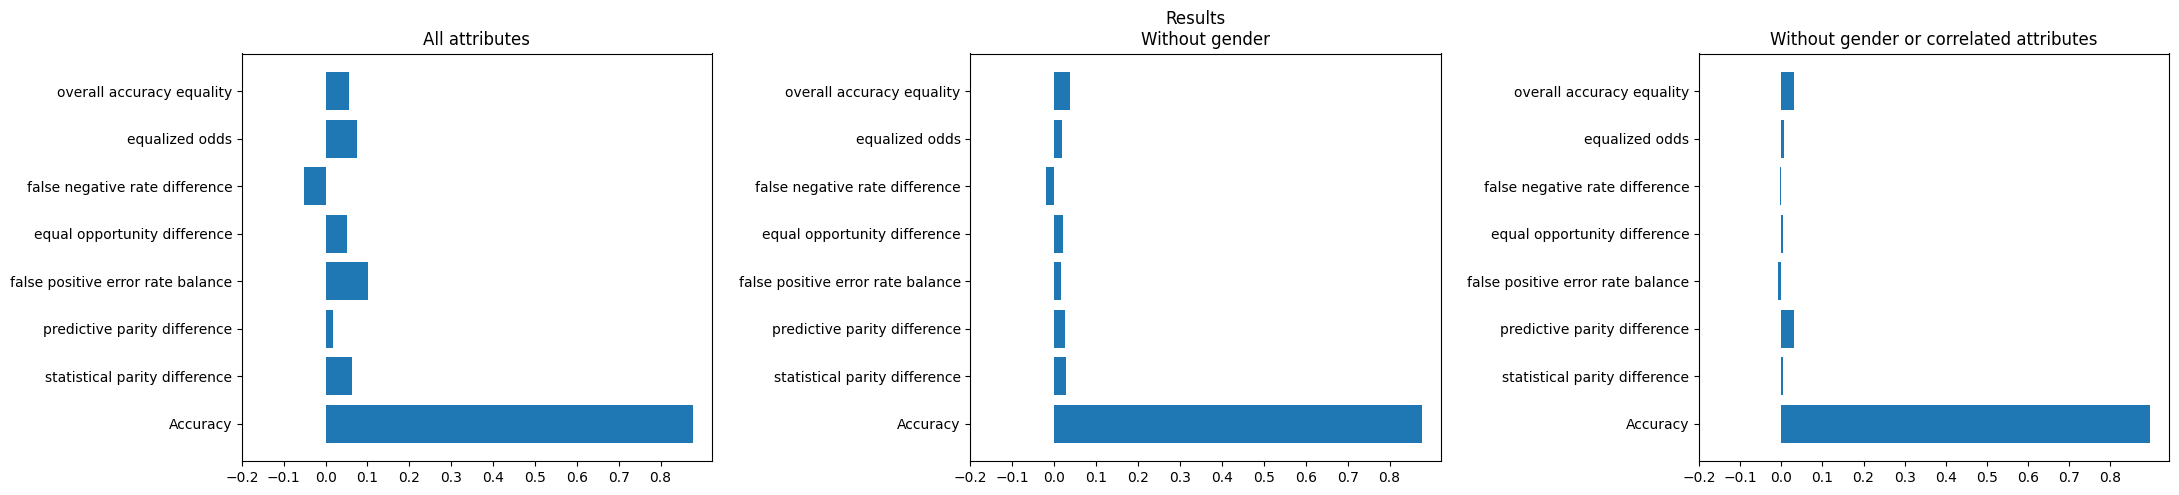

In [67]:
plot_horizontal_dictionaries([final_results_1, final_results_2, final_results_3], title='Results',labels=['All attributes','Without gender','Without gender or correlated attributes'], errors=True)

### 4.3 Accuracy depracation

In [20]:
X_res

NAME_CONTRACT_TYPE  gender  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                       0       0             1                1   
1                       1       0             1                0   
2                       0       1             0                0   
3                       0       0             0                0   
4                       0       1             0                0   
...                   ...     ...           ...              ...   
79494                   0       1             1                1   
79495                   0       0             0                1   
79496                   0       0             1                1   
79497                   0       0             0                0   
79498                   0       0             0                0   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          126000.0    269550.0      12964.5   
1                 2          360000.0    270000.0      13500.0   
2                 0          175500.0    781920.0      43659.0   
3                 1          675000.0   1345500.0      35491.5   
4                 3          180000.0    277969.5      16087.5   
...             ...               ...         ...          ...   
79494             1          121500.0    405000.0      19827.0   
79495             0           90000.0    101880.0      11101.5   
79496             1          180000.0    297130.5      23602.5   
79497             0           78750.0    414792.0      28188.0   
79498             0           81000.0    427500.0      20920.5   

       AMT_GOODS_PRICE  NAME_TYPE_SUITE  ...  \
0             225000.0                0  ...   
1             270000.0                0  ...   
2             675000.0                0  ...   
3            1345500.0                0  ...   
4             229500.0                0  ...   
...                ...              ...  ...   
79494         405000.0                0  ...   
79495          90000.0                0  ...   
79496         256500.0                0  ...   
79497         315000.0                0  ...   
79498         427500.0                0  ...   

       cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF  \
0                              3.888889       0.000000           0.000000   
1                              3.888889       0.000000           0.000000   
2                              3.888889       0.000000           0.000000   
3                              7.960000       0.000000           0.000000   
4                              3.888889       0.000000           0.000000   
...                                 ...            ...                ...   
79494                         17.500000       0.428571           0.228571   
79495                          3.888889       0.000000           0.000000   
79496                          3.888889       0.000000           0.000000   
79497                          4.583333       0.000000           0.000000   
79498                          3.888889       0.000000           0.000000   

       cc_bal_NAME_CONTRACT_STATUS_Active  \
0                                     1.0   
1                                     1.0   
2                                     1.0   
3                                     1.0   
4                                     1.0   
...                                   ...   
79494                                 1.0   
79495                                 1.0   
79496                                 1.0   
79497                                 1.0   
79498                                 1.0   

       cc_bal_NAME_CONTRACT_STATUS_Approved  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
79494                    

In [ ]:
dependent_attributes, independent_attributes = get_chi2(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)
diff_dis_attributes, same_dis_attributes = get_mannwhitneyu(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)

corr_attributes = {**independent_attributes, **same_dis_attributes, **dependent_attributes, **diff_dis_attributes}

corr_attributes = {k: v for k, v in sorted(corr_attributes.items(), key=lambda item: item[1], reverse=False)}
corr_attributes = [k for k,v in corr_attributes.items() if k not in ['CODE_GENDER','Class']]

avg_accuracies = []
    
while len(corr_attributes) > 1:
    
    print(len(corr_attributes))
    
    clf = XGBClassifier()
    clf = clf.fit(X_res[corr_attributes], y_res)
    y_pred = test_model(clf, X_test[corr_attributes])

    avg_accuracies.append(metrics.accuracy_score(y_test, y_pred))

    corr_attributes.pop(0)
    
print(avg_accuracies)

In [33]:
dependent_attributes, independent_attributes = get_chi2(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)
diff_dis_attributes, same_dis_attributes = get_mannwhitneyu(df4chi_k, class_name = 'CODE_GENDER', alpha = 0.01)

corr_attributes = {**independent_attributes, **same_dis_attributes, **dependent_attributes, **diff_dis_attributes}

corr_attributes = {k: v for k, v in sorted(corr_attributes.items(), key=lambda item: item[1], reverse=False)}
corr_attributes = [k for k,v in corr_attributes.items() if k not in ['CODE_GENDER','Class']]

f_avg_accuracies = []
    
while len(corr_attributes) > 1:
    
    print(len(corr_attributes))
    
    dt = tree.DecisionTreeClassifier(random_state=0)
    sfs = SequentialFeatureSelector(dt, n_features_to_select=5, tol=0.1)
    sfs.fit(X_res[corr_attributes], y_res)
    
    dt.fit(sfs.transform(X_res[corr_attributes]), y_res)
    y_pred = test_model(dt, sfs.transform(X_test[corr_attributes]))

    f_avg_accuracies.append(metrics.accuracy_score(y_test, y_pred))

    corr_attributes.pop(0)
    
print(f_avg_accuracies)

369
368
367


KeyboardInterrupt: 

['FLAG_OWN_CAR', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'p_NAME_TYPE_SUITE_Children', 'p_NAME_GOODS_CATEGORY_AudioVideo', 'p_NAME_GOODS_CATEGORY_AutoAccessories', 'p_NAME_GOODS_CATEGORY_ClothingandAccessories', 'p_NAME_GOODS_CATEGORY_Furniture', 'p_NAME_PRODUCT_TYPE_xsell', 'p_NAME_SELLER_INDUSTRY_Autotechnology', 'p_NAME_SELLER_INDUSTRY_Clothing', 'p_NAME_SELLER_INDUSTRY_Furniture', 'p_PRODUCT_COMBINATION_CashXSelllow', 'p_PRODUCT_COMBINATION_CashXSellmiddle', 'p_PRODUCT_COMBINATION_POSindustrywithinterest', 'b_AMT_CREDIT_SUM', 'b_CREDIT_TYPE_Carloan', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'p_CNT_PAYMENT', 'p_NAME_YIELD_GROUP_low_normal', 'DAYS_REGISTRATION', 'p_NAME_GOODS_CATEGORY_Computers', 'p_NAME_PORTFOL

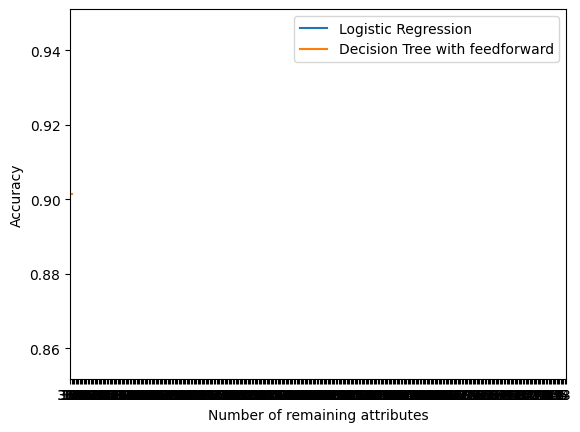

In [34]:
corr_attributes = {**independent_attributes, **same_dis_attributes, **dependent_attributes, **diff_dis_attributes}

corr_attributes = {k: v for k, v in sorted(corr_attributes.items(), key=lambda item: item[1], reverse=False)}
corr_attributes = [k for k,v in corr_attributes.items() if k not in ['CODE_GENDER','Class']]


plt.figure(figsize=(20,4))
plt.plot(avg_accuracies, label='XGBoost')
plt.plot(f_avg_accuracies, label='Decision Tree with feedforward')
plt.xlabel('Number of remaining attributes')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(0,len(corr_attributes),5),labels=range(len(corr_attributes), 0, -5), rotation=45)
plt.legend()

## The end